In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings("ignore")
import folium
import matplotlib as mpl

# Data inspection and cleaning

In [2]:
games=pd.read_csv("games.csv")
games.head()

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  \
0      46.0    1610612759     117.0        0.478        0.815         0.321   
1      40.0    1610612764     112.0        0.561        0.765         0.333   
2      37.0    1610612749     106.0        0.470        0.682         0.433   
3      49.0    1610612765      93.0        0.392        0.735         0.261   
4      47.0    1610612741     110.0        0.500        0.773         0.292   

   AST_away  REB_away  HOME_TEAM_WINS  
0      23.0      44.0               1  
1      20.0      37.0               1  
2      20.0      46.0               1  
3      15.0      46.0               1  
4      20.0      47.0               0  

[5 rows x 21 columns]

In [3]:
games['GAME_STATUS_TEXT'].value_counts()

GAME_STATUS_TEXT
Final    26651
Name: count, dtype: int64

In [4]:
#The GAME_STATUS_TEXT columns doesn't seem to convey any information

games.drop(columns=['GAME_STATUS_TEXT'], inplace=True)

In [5]:
games.loc[games['GAME_DATE_EST']=='2004-04-22']

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
17968    2004-04-22  40300113    1610612752       1610612751    2003   
17969    2004-04-22  40300163    1610612763       1610612759    2003   

       TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  \
17968    1610612752      78.0        0.408        0.500         0.294   
17969    1610612763      93.0        0.487        0.632         0.263   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
17968      18.0      39.0    1610612751      81.0        0.403        0.731   
17969      16.0      31.0    1610612759      95.0        0.472        0.633   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
17968         0.173      20.0      49.0               0  
17969         0.307      19.0      48.0               0

In [6]:
games.sort_values(by=['GAME_DATE_EST'])

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
19288    2003-10-05  10300001    1610612762       1610612742    2003   
19287    2003-10-06  10300002    1610612763       1610612749    2003   
19280    2003-10-07  10300010    1610612764       1610612752    2003   
19286    2003-10-07  10300009    1610612758       1610612746    2003   
19285    2003-10-07  10300005    1610612757       1610612745    2003   
...             ...       ...           ...              ...     ...   
5        2022-12-21  22200469    1610612738       1610612754    2022   
4        2022-12-21  22200468    1610612737       1610612741    2022   
3        2022-12-21  22200467    1610612755       1610612765    2022   
1        2022-12-22  22200478    1610612762       1610612764    2022   
0        2022-12-22  22200477    1610612740       1610612759    2022   

       TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  \
19288    1610612762      90.0        0.457        0.735         0.143   
19287    1610612763     105.0        0.494        0.618         0.267   
19280    1610612764     104.0        0.506        0.677         0.455   
19286    1610612758     101.0        0.467        0.871         0.444   
19285    1610612757     104.0        0.527        0.657         0.429   
...             ...       ...          ...          ...           ...   
5        1610612738     112.0        0.386        0.840         0.317   
4        1610612737     108.0        0.429        1.000         0.378   
3        1610612755     113.0        0.441        0.909         0.297   
1        1610612762     120.0        0.488        0.952         0.457   
0        1610612740     126.0        0.484        0.926         0.382   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
19288      23.0      41.0    1610612742      85.0        0.447        0.500   
19287      25.0      48.0    1610612749      94.0        0.427        0.700   
19280      26.0      45.0    1610612752      86.0        0.380        0.852   
19286      19.0      39.0    1610612746      82.0        0.368        0.609   
19285      22.0      33.0    1610612745      80.0        0.470        0.667   
...         ...       ...           ...       ...          ...          ...   
5          26.0      62.0    1610612754     117.0        0.469        0.778   
4          22.0      47.0    1610612741     110.0        0.500        0.773   
3          27.0      49.0    1610612765      93.0        0.392        0.735   
1          16.0      40.0    1610612764     112.0        0.561        0.765   
0          25.0      46.0    1610612759     117.0        0.478        0.815   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
19288         0.250      20.0      38.0               1  
19287         0.154      20.0      43.0               1  
19280         0.188      19.0      37.0               1  
19286         0.364      13.0      50.0               1  
19285         0.333      10.0      37.0               1  
...             ...       ...       ...             ...  
5             0.462      27.0      47.0               0  
4             0.292      20.0      47.0               0  
3             0.261      15.0      46.0               1  
1             0.333      20.0      37.0               1  
0             0.321      23.0      44.0               1  

[26651 rows x 20 columns]

In [7]:
games_details=pd.read_csv('games_details.csv', low_memory=False)
games_details.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1610612759               SAS  San Antonio    1629641   
1  22200477  1610612759               SAS  San Antonio    1631110   
2  22200477  1610612759               SAS  San Antonio    1627751   
3  22200477  1610612759               SAS  San Antonio    1630170   
4  22200477  1610612759               SAS  San Antonio    1630200   

      PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  OREB  DREB  \
0  Romeo Langford    Romeo              F     NaN  18:06  ...   1.0   1.0   
1   Jeremy Sochan   Jeremy              F     NaN  31:01  ...   6.0   3.0   
2    Jakob Poeltl    Jakob              C     NaN  21:42  ...   1.0   3.0   
3   Devin Vassell    Devin              G     NaN  30:20  ...   0.0   9.0   
4       Tre Jones      Tre              G     NaN  27:44  ...   0.0   2.0   

   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0  2.0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0  
1  9.0  6.0  1.0  0.0  2.0  1.0  23.0       -14.0  
2  4.0  1.0  1.0  0.0  2.0  4.0  13.0        -4.0  
3  9.0  5.0  3.0  0.0  2.0  1.0  10.0       -18.0  
4  2.0  3.0  0.0  0.0  2.0  2.0  19.0         0.0  

[5 rows x 29 columns]

In [8]:
games_details.tail()

GAME_ID     TEAM_ID TEAM_ABBREVIATION TEAM_CITY  PLAYER_ID  \
668623  11200005  1610612743               DEN    Denver     202706   
668624  11200005  1610612743               DEN    Denver     202702   
668625  11200005  1610612743               DEN    Denver     201585   
668626  11200005  1610612743               DEN    Denver     202389   
668627  11200005  1610612743               DEN    Denver     201951   

            PLAYER_NAME NICKNAME START_POSITION COMMENT MIN  ...  OREB  DREB  \
668623  Jordan Hamilton      NaN            NaN     NaN  19  ...   0.0   2.0   
668624   Kenneth Faried      NaN            NaN     NaN  23  ...   1.0   0.0   
668625     Kosta Koufos      NaN            NaN     NaN  15  ...   3.0   5.0   
668626   Timofey Mozgov      NaN            NaN     NaN  19  ...   1.0   2.0   
668627        Ty Lawson      NaN            NaN     NaN  27  ...   0.0   2.0   

        REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
668623  2.0  0.0  2.0  0.0  1.0  3.0  17.0         NaN  
668624  1.0  1.0  1.0  0.0  3.0  3.0  18.0         NaN  
668625  8.0  0.0  1.0  0.0  0.0  3.0   6.0         NaN  
668626  3.0  1.0  0.0  0.0  4.0  2.0   2.0         NaN  
668627  2.0  6.0  2.0  0.0  6.0  1.0   8.0         NaN  

[5 rows x 29 columns]

In [9]:
games_details.isna().sum()

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

**Seems like all the players who haven't played in the game have 'NaN' in most of the statitstics. Nickname is only filled a couple of times and doesn't seem to be anyhow useful, so it will be removed. PLUS_MINUS statistic wasn't gathered 20 years ago, so that's why it also contains smaller number of not NaN cells**

In [10]:
#Checking how often players have NaN in minutes played column

print(games_details['MIN'].isna().sum())

print(games_details['MIN'].isna().sum()/games_details.shape[0])

print(games_details.loc[games_details['MIN']=='0'].shape[0])

print(games_details.loc[games_details['MIN']=='0:00'].shape[0])

109690
0.16405235796287324
85
95


**Out of 600k games_details rows 180 contain '0', and over 100k contain 'NaN', so we can assume NaN means the player played 0 seconds in the game, which happens quite often**

In [11]:
games_details['MIN'].value_counts()

MIN
5               1989
12:00           1788
24              1185
22              1123
21              1059
                ... 
12.000000:29       1
34.000000:50       1
22.000000:07       1
34.000000:52       1
54:48              1
Name: count, Length: 3802, dtype: int64

In [12]:
#Changing Minutes into numeric values

def mintonum(minutes):
    minutes=str(minutes)
    if ':' in minutes:
        minute, second=map(float, minutes.split(":"))
        return minute+(second/60)
    else:
        return float(minutes)

In [13]:
games_details['MIN']=games_details['MIN'].apply(mintonum)

In [14]:
games_details['MIN'].describe()

count    558938.000000
mean         22.909195
std          11.235262
min          -9.000000
25%          14.616667
50%          23.350000
75%          31.800000
max          96.000000
Name: MIN, dtype: float64

**Number of minutes played cannot be below 0, also, longest game aver played lasted 78 minutes, and it, without overtime, lasts 48 minutes, and no player has ever played more than 70 minutes in a game so number of minutes above this threshold are invalid data.**

In [15]:
games_details.loc[games_details['MIN']>=70]

GAME_ID     TEAM_ID TEAM_ABBREVIATION     TEAM_CITY  PLAYER_ID  \
206860  10600102  1610612744               GSW  Golden State     101194   
206864  10600102  1610612744               GSW  Golden State       2693   
206865  10600102  1610612744               GSW  Golden State       2440   
208639  10600027  1610612766               CHA     Charlotte       2679   
208640  10600027  1610612766               CHA     Charlotte       2056   
208641  10600027  1610612766               CHA     Charlotte     101109   
208642  10600027  1610612766               CHA     Charlotte     200797   
208644  10600027  1610612766               CHA     Charlotte     200835   
208648  10600027  1610612749               MIL     Milwaukee     101111   
208649  10600027  1610612749               MIL     Milwaukee     200840   

               PLAYER_NAME NICKNAME START_POSITION COMMENT   MIN  ...  OREB  \
206860    Anthony Roberson      NaN            NaN     NaN  78.0  ...   0.0   
206864        Keith McLeod      NaN            NaN     NaN  86.0  ...   0.0   
206865         Matt Barnes      NaN            NaN     NaN  96.0  ...   2.0   
208639        Matt Carroll      NaN            NaN     NaN  93.0  ...   0.0   
208640       Primoz Brezec      NaN            NaN     NaN  92.0  ...   1.0   
208641      Raymond Felton      NaN            NaN     NaN  79.0  ...   2.0   
208642        Ryan Hollins      NaN            NaN     NaN  84.0  ...   2.0   
208644     Walter Herrmann      NaN            NaN     NaN  72.0  ...   0.0   
208648  Charlie Villanueva      NaN            NaN     NaN  89.0  ...   1.0   
208649        Chris McCray      NaN            NaN     NaN  70.0  ...   0.0   

        DREB  REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
206860   3.0  3.0  1.0  2.0  0.0  1.0  1.0  20.0         NaN  
206864   1.0  1.0  2.0  4.0  0.0  4.0  4.0   2.0         NaN  
206865   5.0  7.0  1.0  1.0  1.0  1.0  4.0  10.0         NaN  
208639   2.0  2.0  1.0  0.0  0.0  1.0  4.0  13.0         NaN  
208640   1.0  2.0  1.0  1.0  1.0  0.0  2.0   6.0         NaN  
208641   4.0  6.0  5.0  2.0  1.0  5.0  1.0  20.0         NaN  
208642   0.0  2.0  0.0  0.0  1.0  1.0  1.0  10.0         NaN  
208644   2.0  2.0  0.0  0.0  0.0  0.0  0.0   0.0         NaN  
208648   2.0  3.0  5.0  0.0  0.0  3.0  6.0   9.0         NaN  
208649   1.0  1.0  1.0  1.0  0.0  0.0  1.0   7.0         NaN  

[10 rows x 29 columns]

In [16]:
games_details.loc[games_details['MIN']>=70]['GAME_ID'].nunique()

2

In [17]:
games_details.loc[games_details['MIN']<0]

GAME_ID     TEAM_ID TEAM_ABBREVIATION      TEAM_CITY  PLAYER_ID  \
139943  10800045  1610612745               HOU        Houston     201171   
139944  10800045  1610612745               HOU        Houston     101236   
139948  10800045  1610612745               HOU        Houston       1897   
139950  10800045  1610612745               HOU        Houston     101144   
139952  10800045  1610612760               OKC  Oklahoma City     101243   
139954  10800045  1610612760               OKC  Oklahoma City       2863   
139955  10800045  1610612760               OKC  Oklahoma City     201182   
139958  10800045  1610612760               OKC  Oklahoma City     101130   
139959  10800045  1610612760               OKC  Oklahoma City     201142   
140132  10800035  1610612756               PHX        Phoenix     201169   
140147  10800035  1610612743               DEN         Denver       2563   
140154  10800035  1610612743               DEN         Denver     200764   

              PLAYER_NAME NICKNAME START_POSITION COMMENT  MIN  ...  OREB  \
139943        Carl Landry      NaN            NaN     NaN -9.0  ...   4.0   
139944        Chuck Hayes      NaN            NaN     NaN -5.0  ...   1.0   
139948  Metta World Peace      NaN            NaN     NaN -7.0  ...   0.0   
139950          Von Wafer      NaN            NaN     NaN -3.0  ...   0.0   
139952    Chris Alexander      NaN            NaN     NaN -8.0  ...   1.0   
139954     Damien Wilkins      NaN            NaN     NaN -2.0  ...   0.0   
139955      Derrick Byars      NaN            NaN     NaN -5.0  ...   1.0   
139958        Johan Petro      NaN            NaN     NaN -4.0  ...   3.0   
139959       Kevin Durant      NaN            NaN     NaN -3.0  ...   3.0   
140132      Alando Tucker      NaN            NaN     NaN -2.0  ...   2.0   
140147      Dahntay Jones      NaN            NaN     NaN -5.0  ...   1.0   
140154    Renaldo Balkman      NaN            NaN     NaN -3.0  ...   1.0   

        DREB  REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
139943   3.0  7.0  0.0  0.0  0.0  2.0  3.0  10.0         NaN  
139944   4.0  5.0  0.0  1.0  1.0  0.0  0.0   4.0         NaN  
139948   0.0  0.0  1.0  0.0  0.0  0.0  2.0   8.0         NaN  
139950   2.0  2.0  0.0  0.0  0.0  2.0  2.0   6.0         NaN  
139952   0.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0         NaN  
139954   3.0  3.0  0.0  0.0  0.0  0.0  3.0   9.0         NaN  
139955   0.0  1.0  0.0  0.0  0.0  2.0  0.0   0.0         NaN  
139958   4.0  7.0  1.0  0.0  1.0  1.0  5.0  12.0         NaN  
139959   2.0  5.0  4.0  4.0  3.0  2.0  2.0  26.0         NaN  
140132   2.0  4.0  0.0  1.0  1.0  1.0  1.0   5.0         NaN  
140147   2.0  3.0  1.0  2.0  0.0  2.0  2.0   8.0         NaN  
140154   3.0  4.0  0.0  0.0  3.0  1.0  1.0   2.0         NaN  

[12 rows x 29 columns]

In [18]:
games_details.loc[games_details['MIN']<0]['GAME_ID'].nunique()

2

In [19]:
#Seems that in both cases there is a problem with 2 games, let's investigate them

games_details.loc[games_details['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])]

GAME_ID     TEAM_ID TEAM_ABBREVIATION  TEAM_CITY  PLAYER_ID  \
139941  10800045  1610612745               HOU    Houston     201166   
139942  10800045  1610612745               HOU    Houston        699   
139943  10800045  1610612745               HOU    Houston     201171   
139944  10800045  1610612745               HOU    Houston     101236   
139945  10800045  1610612745               HOU    Houston     201199   
...          ...         ...               ...        ...        ...   
208654  10600027  1610612749               MIL  Milwaukee       2696   
208655  10600027  1610612749               MIL  Milwaukee       2072   
208656  10600027  1610612749               MIL  Milwaukee     200839   
208657  10600027  1610612749               MIL  Milwaukee       1739   
208658  10600027  1610612749               MIL  Milwaukee       2581   

            PLAYER_NAME NICKNAME START_POSITION COMMENT   MIN  ...  OREB  \
139941     Aaron Brooks      NaN            NaN     NaN   0.0  ...   0.0   
139942      Brent Barry      NaN            NaN     NaN   2.0  ...   1.0   
139943      Carl Landry      NaN            NaN     NaN  -9.0  ...   4.0   
139944      Chuck Hayes      NaN            NaN     NaN  -5.0  ...   1.0   
139945    DJ Strawberry      NaN            NaN     NaN   7.0  ...   0.0   
...                 ...      ...            ...     ...   ...  ...   ...   
208654       Lynn Greer      NaN            NaN     NaN  44.0  ...   0.0   
208655     Michael Redd      NaN            NaN     NaN  25.0  ...   0.0   
208656      Mike Harris      NaN            NaN     NaN  28.0  ...   0.0   
208657  Ruben Patterson      NaN            NaN     NaN  20.0  ...   5.0   
208658      Steve Blake      NaN            NaN     NaN  25.0  ...   1.0   

        DREB  REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
139941   1.0  1.0  3.0  0.0  0.0  3.0  3.0  20.0         NaN  
139942   0.0  1.0  5.0  0.0  0.0  1.0  2.0  11.0         NaN  
139943   3.0  7.0  0.0  0.0  0.0  2.0  3.0  10.0         NaN  
139944   4.0  5.0  0.0  1.0  1.0  0.0  0.0   4.0         NaN  
139945   2.0  2.0  0.0  2.0  0.0  0.0  5.0  16.0         NaN  
...      ...  ...  ...  ...  ...  ...  ...   ...         ...  
208654   0.0  0.0  0.0  0.0  0.0  1.0  2.0   4.0         NaN  
208655   2.0  2.0  3.0  0.0  0.0  1.0  2.0  21.0         NaN  
208656   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0         NaN  
208657   0.0  5.0  4.0  2.0  0.0  3.0  3.0   6.0         NaN  
208658   2.0  3.0  3.0  0.0  0.0  2.0  3.0   2.0         NaN  

[89 rows x 29 columns]

In [20]:
games.loc[games['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])]

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
12238    2008-10-13  10800045    1610612745       1610612760    2008   
12245    2008-10-11  10800035    1610612756       1610612743    2008   
15028    2006-10-24  10600102    1610612744       1610612757    2006   
15088    2006-10-13  10600027    1610612766       1610612749    2006   

       TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  \
12238    1610612745     104.0        0.446        0.846         0.348   
12245    1610612756      72.0        0.316        0.690         0.125   
15028    1610612744     108.0        0.537        0.591         0.389   
15088    1610612766     100.0        0.438        0.721         0.357   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
12238      19.0      40.0    1610612760     110.0        0.482        0.879   
12245       8.0      52.0    1610612743      77.0        0.362        0.474   
15028      28.0      39.0    1610612757      96.0        0.474        0.654   
15088      23.0      40.0    1610612749     104.0        0.452        0.700   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
12238         0.143      19.0      45.0               0  
12245         0.091       7.0      51.0               0  
15028         0.467      21.0      39.0               1  
15088         0.438      21.0      38.0               0

**All of these games are preseason games, so it's extremely hard to find the true data. Also, removing these games probably won't cause a huge loss on the quality of the dataset, as the amount is very small. So, they will be removed. In dataframe games_details the whole games will be removed as their games seem to be completely incorrect**

In [21]:
print(games.shape)
print(games_details.shape)

(26651, 20)
(668628, 29)


In [22]:
index_games = games[games['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])].index
games.drop(index_games , inplace=True)
games.shape

(26647, 20)

In [23]:
index_games = games_details[games_details['GAME_ID'].isin([10800045, 10800035, 10600027, 10600102])].index
games_details.drop(index_games , inplace=True)
games_details.shape

(668539, 29)

In [24]:
#Investigating 'COMMENT' columns
games_details['COMMENT'][games_details['COMMENT'].notnull()]

13        DNP - Coach's Decision
51        DNP - Coach's Decision
62        DNP - Coach's Decision
63        DNP - Coach's Decision
64        DNP - Coach's Decision
                   ...          
665946    DNP - Coach's Decision
665958    DNP - Coach's Decision
665969    DNP - Coach's Decision
665970    DNP - Coach's Decision
665971    DNP - Coach's Decision
Name: COMMENT, Length: 109689, dtype: object

In [25]:
games_details['COMMENT'].value_counts()

COMMENT
DNP - Coach's Decision                      58054
DNP - Coach's Decision                      30547
DND - Injury/Illness                         1267
DNP - Injury/Illness                         1161
DNP - Injury/Illness                         1151
                                            ...  
DND - Strained rt. calf                         1
DND - Left Achilles Surgery.                    1
DND - Tendonitis Left Ankle                     1
DND - Right quadriceps strain                   1
DND - Non-Displaced Fracture, Left Fibul        1
Name: count, Length: 5348, dtype: int64

In [26]:
games_details.loc[(games_details['COMMENT'].notnull()) & (games_details['MIN'].isna())]

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
13      22200477  1610612759               SAS  San Antonio     203476   
51      22200478  1610612762               UTA         Utah    1630695   
62      22200466  1610612749               MIL    Milwaukee     203648   
63      22200466  1610612749               MIL    Milwaukee     201588   
64      22200466  1610612749               MIL    Milwaukee     201586   
...          ...         ...               ...          ...        ...   
665946  21200003  1610612747               LAL  Los Angeles     203135   
665958  21200001  1610612764               WAS   Washington     201858   
665969  21200001  1610612739               CLE    Cleveland     201956   
665970  21200001  1610612739               CLE    Cleveland     202720   
665971  21200001  1610612739               CLE    Cleveland     202396   

                   PLAYER_NAME  NICKNAME START_POSITION  \
13                Gorgui Dieng    Gorgui            NaN   
51                Micah Potter     Micah            NaN   
62      Thanasis Antetokounmpo  Thanasis            NaN   
63                 George Hill    George            NaN   
64                 Serge Ibaka     Serge            NaN   
...                        ...       ...            ...   
665946            Robert Sacre       NaN            NaN   
665958          Cartier Martin       NaN            NaN   
665969             Omri Casspi       NaN            NaN   
665970               Jon Leuer       NaN            NaN   
665971         Samardo Samuels       NaN            NaN   

                       COMMENT  MIN  ...  OREB  DREB  REB  AST  STL  BLK  TO  \
13      DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
51      DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
62      DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
63      DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
64      DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
...                        ...  ...  ...   ...   ...  ...  ...  ...  ...  ..   
665946  DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
665958  DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
665969  DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
665970  DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   
665971  DNP - Coach's Decision  NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN NaN   

        PF  PTS  PLUS_MINUS  
13     NaN  NaN         NaN  
51     NaN  NaN         NaN  
62     NaN  NaN         NaN  
63     NaN  NaN         NaN  
64     NaN  NaN         NaN  
...     ..  ...         ...  
665946 NaN  NaN         NaN  
665958 NaN  NaN         NaN  
665969 NaN  NaN         NaN  
665970 NaN  NaN         NaN  
665971 NaN  NaN         NaN  

[109689 rows x 29 columns]

**As the dataframe length and number of comments is the same - it seems that every absence is explained and that's what the COMMENT column contains**

**Also, the abbreviation of the reasons of absences do not seem to be consistent as, for example DNP may mean INJURY/ILLNESS or Coach's Deision.**

**Usually, NBA players miss games due to medical issues, personal reasons or coach decision. Let's try to extract these 3 features.**

In [27]:
comments=games_details.loc[games_details['COMMENT'].notnull()]['COMMENT'].to_list()
comments_personal=[comment for comment in comments if 'personal' in comment.lower()]
print(f'Number of personal reasons: {len(comments_personal)}')
comments_coach=[comment for comment in comments if 'coach' in comment.lower()]
print(f"Number of coach's decisions: {len(comments_coach)}")

Number of personal reasons: 592
Number of coach's decisions: 88821


**Let's assume all the other abscences are due to injury, as many of them are very specified, and it will be extremely hard to go through them all.**

In [28]:
def com_to_abs(comment):
    if pd.notna(comment):
        if 'coach' in str(comment).lower():
            return "Coach's decision"
        elif 'personal' in str(comment).lower():
            return "Personal reasons"
        else:
            return "Injury"
    else:
        return np.nan

In [29]:
games_details['COMMENT']=games_details['COMMENT'].apply(com_to_abs)
games_details['COMMENT'].value_counts()

COMMENT
Coach's decision    88821
Injury              20276
Personal reasons      592
Name: count, dtype: int64

In [30]:
games_details.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1610612759               SAS  San Antonio    1629641   
1  22200477  1610612759               SAS  San Antonio    1631110   
2  22200477  1610612759               SAS  San Antonio    1627751   
3  22200477  1610612759               SAS  San Antonio    1630170   
4  22200477  1610612759               SAS  San Antonio    1630200   

      PLAYER_NAME NICKNAME START_POSITION COMMENT        MIN  ...  OREB  DREB  \
0  Romeo Langford    Romeo              F     NaN  18.100000  ...   1.0   1.0   
1   Jeremy Sochan   Jeremy              F     NaN  31.016667  ...   6.0   3.0   
2    Jakob Poeltl    Jakob              C     NaN  21.700000  ...   1.0   3.0   
3   Devin Vassell    Devin              G     NaN  30.333333  ...   0.0   9.0   
4       Tre Jones      Tre              G     NaN  27.733333  ...   0.0   2.0   

   REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0  2.0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0  
1  9.0  6.0  1.0  0.0  2.0  1.0  23.0       -14.0  
2  4.0  1.0  1.0  0.0  2.0  4.0  13.0        -4.0  
3  9.0  5.0  3.0  0.0  2.0  1.0  10.0       -18.0  
4  2.0  3.0  0.0  0.0  2.0  2.0  19.0         0.0  

[5 rows x 29 columns]

In [31]:
print(games['GAME_ID'].nunique(), games_details['GAME_ID'].nunique())

26618 26519


**There are some games that are in the games table but not in the games_details one. Let's investigate it.**

In [32]:
games_details_list=list(games_details['GAME_ID'].unique())
games_list=list(games['GAME_ID'].unique())

In [33]:
games_details.loc[~games_details['GAME_ID'].isin(games_list)]

Empty DataFrame
Columns: [GAME_ID, TEAM_ID, TEAM_ABBREVIATION, TEAM_CITY, PLAYER_ID, PLAYER_NAME, NICKNAME, START_POSITION, COMMENT, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, STL, BLK, TO, PF, PTS, PLUS_MINUS]
Index: []

[0 rows x 29 columns]

In [34]:
games_not_details=games.loc[~games['GAME_ID'].isin(games_details_list)]
games_not_details

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
19175    2003-10-24  10300116    1610612753       1610612762    2003   
19176    2003-10-24  10300108    1610612737       1610612764    2003   
19177    2003-10-24  10300109    1610612738       1610612751    2003   
19178    2003-10-24  10300113    1610612759       1610612745    2003   
19179    2003-10-24  10300112    1610612749       1610612765    2003   
...             ...       ...           ...              ...     ...   
19269    2003-10-09  10300019    1610612743       1610612756    2003   
19270    2003-10-09  10300022    1610612757       1610612758    2003   
19271    2003-10-08  10300013    1610612759       1610612763    2003   
19278    2003-10-08  10300015    1610612747       1610612744    2003   
19279    2003-10-07  10300006    1610612747       1610612744    2003   

       TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  \
19175    1610612753       NaN          NaN          NaN           NaN   
19176    1610612737       NaN          NaN          NaN           NaN   
19177    1610612738       NaN          NaN          NaN           NaN   
19178    1610612759       NaN          NaN          NaN           NaN   
19179    1610612749       NaN          NaN          NaN           NaN   
...             ...       ...          ...          ...           ...   
19269    1610612743       NaN          NaN          NaN           NaN   
19270    1610612757       NaN          NaN          NaN           NaN   
19271    1610612759       NaN          NaN          NaN           NaN   
19278    1610612747       NaN          NaN          NaN           NaN   
19279    1610612747       NaN          NaN          NaN           NaN   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
19175       NaN       NaN    1610612762       NaN          NaN          NaN   
19176       NaN       NaN    1610612764       NaN          NaN          NaN   
19177       NaN       NaN    1610612751       NaN          NaN          NaN   
19178       NaN       NaN    1610612745       NaN          NaN          NaN   
19179       NaN       NaN    1610612765       NaN          NaN          NaN   
...         ...       ...           ...       ...          ...          ...   
19269       NaN       NaN    1610612756       NaN          NaN          NaN   
19270       NaN       NaN    1610612758       NaN          NaN          NaN   
19271       NaN       NaN    1610612763       NaN          NaN          NaN   
19278       NaN       NaN    1610612744       NaN          NaN          NaN   
19279       NaN       NaN    1610612744       NaN          NaN          NaN   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
19175           NaN       NaN       NaN               0  
19176           NaN       NaN       NaN               0  
19177           NaN       NaN       NaN               0  
19178           NaN       NaN       NaN               0  
19179           NaN       NaN       NaN               0  
...             ...       ...       ...             ...  
19269           NaN       NaN       NaN               0  
19270           NaN       NaN       NaN               0  
19271           NaN       NaN       NaN               0  
19278           NaN       NaN       NaN               0  
19279           NaN       NaN       NaN               0  

[99 rows x 20 columns]

**So, there are 99 games, that are not in games_details table but they appear in games table. Let's exclude them for consistent data**

In [35]:
games_not_details_list=list(games_not_details["GAME_ID"])
games=games.loc[~games['GAME_ID'].isin(games_not_details_list)]
games["GAME_ID"].nunique()

26519

**Let's assign season to each game. For easier computation, the "SEASON" column is represented by the year of the season ending**

In [36]:
for index, row in games.iterrows():
    year=str(games.at[index, 'GAME_DATE_EST'])[:4]
    month=str(games.at[index, 'GAME_DATE_EST'])[5:7]
    if int(month)>9:
        games.at[index, 'SEASON']=int(year)+1
    else:
        games.at[index, 'SEASON']=int(year) 

In [37]:
games["SEASON"].value_counts()

SEASON
2006    1432
2014    1427
2010    1424
2009    1423
2011    1422
2013    1420
2015    1418
2007    1417
2016    1416
2008    1411
2017    1407
2022    1390
2018    1387
2019    1371
2005    1362
2004    1286
2021    1254
2020    1236
2012    1104
2023     541
Name: count, dtype: int64

In [38]:
games_details = pd.merge(games_details, games[['GAME_ID', 'SEASON']], on='GAME_ID')
games_details.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1610612759               SAS  San Antonio    1629641   
1  22200477  1610612759               SAS  San Antonio    1631110   
2  22200477  1610612759               SAS  San Antonio    1627751   
3  22200477  1610612759               SAS  San Antonio    1630170   
4  22200477  1610612759               SAS  San Antonio    1630200   

      PLAYER_NAME NICKNAME START_POSITION COMMENT        MIN  ...  DREB  REB  \
0  Romeo Langford    Romeo              F     NaN  18.100000  ...   1.0  2.0   
1   Jeremy Sochan   Jeremy              F     NaN  31.016667  ...   3.0  9.0   
2    Jakob Poeltl    Jakob              C     NaN  21.700000  ...   3.0  4.0   
3   Devin Vassell    Devin              G     NaN  30.333333  ...   9.0  9.0   
4       Tre Jones      Tre              G     NaN  27.733333  ...   2.0  2.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  SEASON  
0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0    2023  
1  6.0  1.0  0.0  2.0  1.0  23.0       -14.0    2023  
2  1.0  1.0  0.0  2.0  4.0  13.0        -4.0    2023  
3  5.0  3.0  0.0  2.0  1.0  10.0       -18.0    2023  
4  3.0  0.0  0.0  2.0  2.0  19.0         0.0    2023  

[5 rows x 30 columns]

In [39]:
games_details["SEASON"].value_counts() #Seems that everything went fine

SEASON
2015    37244
2016    37160
2017    37053
2014    36386
2022    36376
2013    36198
2018    35910
2019    35082
2021    34711
2006    34521
2010    34175
2007    34100
2009    34095
2011    34091
2008    33917
2005    32601
2020    32138
2004    30703
2012    28391
2023    14619
Name: count, dtype: int64

In [40]:
players=pd.read_csv('players.csv')
players.head()

PLAYER_NAME     TEAM_ID  PLAYER_ID  SEASON
0     Royce O'Neale  1610612762    1626220    2019
1  Bojan Bogdanovic  1610612762     202711    2019
2       Rudy Gobert  1610612762     203497    2019
3  Donovan Mitchell  1610612762    1628378    2019
4       Mike Conley  1610612762     201144    2019

In [41]:
ranking=pd.read_csv('Ranking.csv')
ranking.head()

TEAM_ID  LEAGUE_ID  SEASON_ID STANDINGSDATE CONFERENCE         TEAM   G  \
0  1610612743          0      22022    2022-12-22       West       Denver  30   
1  1610612763          0      22022    2022-12-22       West      Memphis  30   
2  1610612740          0      22022    2022-12-22       West  New Orleans  31   
3  1610612756          0      22022    2022-12-22       West      Phoenix  32   
4  1610612746          0      22022    2022-12-22       West  LA Clippers  33   

    W   L  W_PCT HOME_RECORD ROAD_RECORD  RETURNTOPLAY  
0  19  11  0.633        10-3         9-8           NaN  
1  19  11  0.633        13-2         6-9           NaN  
2  19  12  0.613        13-4         6-8           NaN  
3  19  13  0.594        14-4         5-9           NaN  
4  19  14  0.576        11-7         8-7           NaN

In [42]:
ranking["SEASON_ID"].value_counts()

SEASON_ID
22010    12480
22019    12240
22018    10470
22017    10380
22021    10380
22004    10260
22009    10230
22007    10230
22013    10200
22006    10200
22012    10200
22016    10200
22015    10200
22014    10170
22003    10150
22005    10140
22008    10140
22020     8573
22011     8550
22022     1980
12019      900
12006      780
12009      780
12015      750
12012      750
12014      720
12007      720
12016      720
12013      720
12008      690
12010      690
12003      667
12005      660
12004      630
12022      540
12018      540
12017      510
12021      480
12020      336
12011      270
22002      116
Name: count, dtype: int64

In [43]:
games_details['SEASON']=games_details["SEASON"].astype(int)
games_details.head()

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0  22200477  1610612759               SAS  San Antonio    1629641   
1  22200477  1610612759               SAS  San Antonio    1631110   
2  22200477  1610612759               SAS  San Antonio    1627751   
3  22200477  1610612759               SAS  San Antonio    1630170   
4  22200477  1610612759               SAS  San Antonio    1630200   

      PLAYER_NAME NICKNAME START_POSITION COMMENT        MIN  ...  DREB  REB  \
0  Romeo Langford    Romeo              F     NaN  18.100000  ...   1.0  2.0   
1   Jeremy Sochan   Jeremy              F     NaN  31.016667  ...   3.0  9.0   
2    Jakob Poeltl    Jakob              C     NaN  21.700000  ...   3.0  4.0   
3   Devin Vassell    Devin              G     NaN  30.333333  ...   9.0  9.0   
4       Tre Jones      Tre              G     NaN  27.733333  ...   2.0  2.0   

   AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  SEASON  
0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0    2023  
1  6.0  1.0  0.0  2.0  1.0  23.0       -14.0    2023  
2  1.0  1.0  0.0  2.0  4.0  13.0        -4.0    2023  
3  5.0  3.0  0.0  2.0  1.0  10.0       -18.0    2023  
4  3.0  0.0  0.0  2.0  2.0  19.0         0.0    2023  

[5 rows x 30 columns]

**A seasons start in year X, and finish in year X+1, the first digit defines whether it's the first part of the season or the second one, and the latter four define the year. The results seem relevant, as the number of games played in the last part of the starting year is significantly smaller than the amount of matches in the second part of the season**


In [44]:
print(games_details["PLAYER_ID"].nunique(), games_details["PLAYER_NAME"].nunique())

2687 2664


In [45]:
#Counting how many games each player played

players_matches={}
for index, row in games_details.iterrows():
    if row['MIN']>0:
        if row["PLAYER_ID"] in players_matches.keys():
            players_matches[row["PLAYER_ID"]]+=1
        else:
            players_matches[row["PLAYER_ID"]]=1
players_matches

{1629641: 141,
 1631110: 30,
 1627751: 501,
 1630170: 175,
 1630200: 145,
 1628380: 244,
 203926: 624,
 1626196: 521,
 1631103: 22,
 1628966: 212,
 1629646: 51,
 1626169: 468,
 1629676: 152,
 1630530: 107,
 1630230: 133,
 202685: 844,
 1630529: 116,
 203468: 726,
 1626195: 350,
 1630700: 27,
 1630631: 99,
 1629637: 227,
 1628984: 307,
 202066: 789,
 1630557: 108,
 1628398: 429,
 1629655: 228,
 203078: 763,
 1628420: 386,
 201959: 1054,
 1629060: 182,
 1630692: 33,
 203115: 738,
 1629653: 35,
 1631098: 13,
 1630264: 113,
 1628374: 338,
 1629020: 223,
 1631117: 36,
 203903: 726,
 201144: 1135,
 1629012: 262,
 200752: 1191,
 1627736: 426,
 1629638: 202,
 1630195: 50,
 1630534: 19,
 1631323: 23,
 1628962: 54,
 1629659: 185,
 1630699: 25,
 203507: 805,
 201572: 1041,
 1628960: 266,
 201950: 999,
 1626171: 562,
 1626192: 546,
 204060: 673,
 1628975: 300,
 202083: 1040,
 1630171: 182,
 1630596: 110,
 1628386: 406,
 1628378: 437,
 1629636: 226,
 201567: 958,
 1627747: 383,
 1626224: 395,
 2027

In [46]:
# Adding number of matches played to each player

games_details['MAT']=games_details['PLAYER_ID'].map(players_matches)

In [47]:
# Creating players averages dataframe, adding some features, taking into account players who played at least 10 games

players_avg=games_details.loc[games_details['MAT']>10].groupby(by=['PLAYER_NAME']).mean(numeric_only=True)
players_avg=players_avg.drop(columns=['GAME_ID', 'TEAM_ID', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'SEASON', 'MAT'])
players_avg=players_avg.round(2)
players_avg['PLAYER_ID']=players_avg['PLAYER_ID'].astype(int)
players_avg['FT_PCT']=players_avg['FTM']/players_avg['FTA']
players_avg['FG3_PCT']=players_avg['FG3M']/players_avg['FG3A']
players_avg['FG_PCT']=players_avg['FGM']/players_avg['FGA']
players_avg['TS']=players_avg['PTS']/(2*(players_avg['FGA']+0.44*players_avg['FTA']))
players_avg.head()

PLAYER_ID    MIN   FGM   FGA  FG3M  FG3A   FTM   FTA  OREB  \
PLAYER_NAME                                                                
AJ Green        1631260   7.98  1.24  3.06  0.88  2.53  0.18  0.18  0.24   
AJ Griffin      1631100  20.89  4.06  8.72  1.84  4.69  0.47  0.59  0.75   
AJ Hammons      1627773   8.48  1.17  2.62  0.17  0.41  0.31  0.69  0.48   
AJ Price         201985  15.04  2.18  5.60  0.89  2.67  0.85  1.14  0.28   
Aaron Brooks     201166  20.58  3.45  8.37  1.24  3.38  1.45  1.73  0.38   

              DREB  ...   STL   BLK    TO    PF    PTS  PLUS_MINUS    FT_PCT  \
PLAYER_NAME         ...                                                        
AJ Green      0.82  ...  0.18  0.00  0.35  0.94   3.53       -1.12  1.000000   
AJ Griffin    1.50  ...  1.00  0.09  0.81  1.28  10.44       -0.72  0.796610   
AJ Hammons    1.59  ...  0.03  0.55  0.48  1.17   2.83        0.07  0.449275   
AJ Price      1.17  ...  0.48  0.03  0.93  0.96   6.09       -0.20  0.745614   
Aaron Brooks  1.28  ...  0.54  0.13  1.53  1.88   9.58       -0.47  0.838150   

               FG3_PCT    FG_PCT        TS  
PLAYER_NAME                                 
AJ Green      0.347826  0.405229  0.562245  
AJ Griffin    0.392324  0.465596  0.581318  
AJ Hammons    0.414634  0.446565  0.483992  
AJ Price      0.333333  0.389286  0.499049  
Aaron Brooks  0.366864  0.412186  0.524575  

[5 rows x 22 columns]

In [48]:
# Creating players season averages dataframe, adding some features, taking into account players who played at least 10 games

season_player_avg=games_details.loc[games_details['MAT']>10].groupby(by=['SEASON', 'PLAYER_NAME']).mean(numeric_only=True)
season_player_avg=season_player_avg.round(2)
season_player_avg.drop(columns=['GAME_ID', 'TEAM_ID', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'MAT'], inplace=True) #dropping percentages columns
season_player_avg.sort_values(['SEASON', 'PTS'], ascending=False, inplace=True)
season_player_avg['FT_PCT']=season_player_avg['FTM']/season_player_avg['FTA']
season_player_avg['FG3_PCT']=season_player_avg['FG3M']/season_player_avg['FG3A']
season_player_avg['FG_PCT']=season_player_avg['FGM']/season_player_avg['FGA']
season_player_avg['TS']=season_player_avg['PTS']/(2*(season_player_avg['FGA']+0.44*season_player_avg['FTA']))
season_player_avg.head()

PLAYER_ID    MIN    FGM    FGA  FG3M  FG3A  \
SEASON PLAYER_NAME                                                           
2023   Luka Doncic              1629029.0  35.56  10.74  21.61  2.81  8.13   
       Shai Gilgeous-Alexander  1628983.0  35.66  10.31  20.69  1.00  3.00   
       Joel Embiid               203954.0  34.54  10.29  19.79  1.00  3.08   
       Giannis Antetokounmpo     203507.0  32.58  10.96  20.93  0.75  3.00   
       Jayson Tatum             1628369.0  36.24   9.61  20.61  3.18  9.21   

                                 FTM    FTA  OREB  DREB  ...   STL   BLK  \
SEASON PLAYER_NAME                                       ...               
2023   Luka Doncic              7.13   9.71  0.77  7.16  ...  1.61  0.65   
       Shai Gilgeous-Alexander  9.55  10.28  0.79  3.86  ...  1.69  1.00   
       Joel Embiid              9.54  11.17  1.50  8.08  ...  1.08  1.54   
       Giannis Antetokounmpo    8.18  12.61  2.04  9.11  ...  0.89  0.93   
       Jayson Tatum             7.06   8.15  1.12  7.00  ...  1.09  0.85   

                                  TO    PF    PTS  PLUS_MINUS    FT_PCT  \
SEASON PLAYER_NAME                                                        
2023   Luka Doncic              3.58  2.61  31.42        3.42  0.734295   
       Shai Gilgeous-Alexander  3.41  2.59  31.17        0.28  0.928988   
       Joel Embiid              3.71  3.17  31.12        5.71  0.854073   
       Giannis Antetokounmpo    3.64  3.57  30.86        3.25  0.648692   
       Jayson Tatum             2.76  2.09  29.45        7.52  0.866258   

                                 FG3_PCT    FG_PCT        TS  
SEASON PLAYER_NAME                                            
2023   Luka Doncic              0.345633  0.496992  0.606976  
       Shai Gilgeous-Alexander  0.333333  0.498308  0.618129  
       Joel Embiid              0.324675  0.519960  0.629837  
       Giannis Antetokounmpo    0.250000  0.523650  0.582739  
       Jayson Tatum             0.345277  0.466279  0.608572  

[5 rows x 22 columns]

In [49]:
# Creating players sum dataframe, adding some features, taking into account players who played at least 10 games

players_sum=games_details.loc[games_details['MAT']>10].groupby(by=['PLAYER_NAME']).sum(numeric_only=True)
players_sum=players_sum.round(2)
players_sum.drop(columns=['GAME_ID', 'TEAM_ID', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'SEASON', 'MAT'], inplace=True) #dropping percentages columns
players_sum.sort_values('PTS', ascending=False, inplace=True)
players_sum['FT_PCT']=players_sum['FTM']/players_sum['FTA']
players_sum['FG3_PCT']=players_sum['FG3M']/players_sum['FG3A']
players_sum['FG_PCT']=players_sum['FGM']/players_sum['FGA']
players_sum['TS']=players_sum['PTS']/(2*(players_sum['FGA']+0.44*players_sum['FTA']))
players_sum.head()

PLAYER_ID       MIN      FGM      FGA    FG3M    FG3A  \
PLAYER_NAME                                                              
LeBron James       4566480  65922.92  16982.0  33794.0  2679.0  7797.0   
Kevin Durant     246197808  43914.85  11091.0  22443.0  2287.0  6002.0   
Carmelo Anthony    3864828  48711.42  11280.0  25398.0  1928.0  5453.0   
James Harden     244947155  40419.33   8416.0  19157.0  3174.0  8840.0   
Dwyane Wade        3483116  44051.18  10256.0  21466.0   688.0  2289.0   

                    FTM      FTA    OREB     DREB  ...     STL     BLK  \
PLAYER_NAME                                        ...                   
LeBron James     9995.0  13601.0  2080.0  11067.0  ...  2726.0  1346.0   
Kevin Durant     7984.0   9059.0   825.0   7609.0  ...  1293.0  1328.0   
Carmelo Anthony  7170.0   8803.0  2225.0   6544.0  ...  1407.0   708.0   
James Harden     8521.0   9915.0   904.0   5605.0  ...  1817.0   619.0   
Dwyane Wade      6902.0   9009.0  1537.0   4544.0  ...  1993.0  1093.0   

                     TO      PF      PTS  PLUS_MINUS    FT_PCT   FG3_PCT  \
PLAYER_NAME                                                                
LeBron James     6038.0  3278.0  46638.0      8456.0  0.734872  0.343594   
Kevin Durant     3750.0  2395.0  32453.0      5353.0  0.881333  0.381040   
Carmelo Anthony  3465.0  4055.0  31658.0      1091.0  0.814495  0.353567   
James Harden     4356.0  3120.0  28527.0      4428.0  0.859405  0.359050   
Dwyane Wade      4088.0  2930.0  28102.0      3186.0  0.766123  0.300568   

                   FG_PCT        TS  
PLAYER_NAME                          
LeBron James     0.502515  0.586222  
Kevin Durant     0.494185  0.613967  
Carmelo Anthony  0.444129  0.540768  
James Harden     0.439317  0.606452  
Dwyane Wade      0.477779  0.552537  

[5 rows x 22 columns]

In [50]:
# Creating players season sums dataframe, adding some features, taking into account players who played at least 10 games

players_season_sum=games_details.loc[games_details['MAT']>10].groupby(by=['SEASON', 'PLAYER_NAME']).sum(numeric_only=True)
players_season_sum=players_season_sum.round(2)
players_season_sum.drop(columns=['GAME_ID', 'TEAM_ID', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'MAT'], inplace=True) #dropping percentages columns
players_season_sum.sort_values(['SEASON', 'PTS'], ascending=False, inplace=True)
players_season_sum['FT_PCT']=players_season_sum['FTM']/players_season_sum['FTA']
players_season_sum['FG3_PCT']=players_season_sum['FG3M']/players_season_sum['FG3A']
players_season_sum['FG_PCT']=players_season_sum['FGM']/players_season_sum['FGA']
players_season_sum['TS']=players_season_sum['PTS']/(2*(players_season_sum['FGA']+0.44*players_season_sum['FTA']))
players_season_sum.head()

PLAYER_ID      MIN    FGM    FGA   FG3M  \
SEASON PLAYER_NAME                                                        
2023   Kevin Durant               7039970  1236.72  361.0  648.0   59.0   
       Luka Doncic               52128928  1102.35  333.0  670.0   87.0   
       Jayson Tatum              55364546  1196.08  317.0  680.0  105.0   
       Donovan Mitchell          55364852  1136.73  315.0  636.0  122.0   
       Shai Gilgeous-Alexander   53756439  1034.12  299.0  600.0   29.0   

                                 FG3A    FTM    FTA  OREB   DREB  ...   STL  \
SEASON PLAYER_NAME                                                ...         
2023   Kevin Durant             163.0  227.0  248.0  10.0  208.0  ...  31.0   
       Luka Doncic              252.0  221.0  301.0  24.0  222.0  ...  50.0   
       Jayson Tatum             304.0  233.0  269.0  37.0  231.0  ...  36.0   
       Donovan Mitchell         283.0  154.0  174.0  31.0   94.0  ...  41.0   
       Shai Gilgeous-Alexander   87.0  277.0  298.0  23.0  112.0  ...  49.0   

                                 BLK     TO    PF     PTS  PLUS_MINUS  \
SEASON PLAYER_NAME                                                      
2023   Kevin Durant             54.0  123.0  78.0  1008.0       109.0   
       Luka Doncic              20.0  111.0  81.0   974.0       106.0   
       Jayson Tatum             28.0   91.0  69.0   972.0       248.0   
       Donovan Mitchell         11.0   92.0  87.0   906.0       141.0   
       Shai Gilgeous-Alexander  29.0   99.0  75.0   904.0         8.0   

                                  FT_PCT   FG3_PCT    FG_PCT        TS  
SEASON PLAYER_NAME                                                      
2023   Kevin Durant             0.915323  0.361963  0.557099  0.665680  
       Luka Doncic              0.734219  0.345238  0.497015  0.606899  
       Jayson Tatum             0.866171  0.345395  0.466176  0.608748  
       Donovan Mitchell         0.885057  0.431095  0.495283  0.635736  
       Shai Gilgeous-Alexander  0.929530  0.333333  0.498333  0.618230  

[5 rows x 22 columns]

In [51]:
stats=list(players_avg.columns)[1:]

# Players averages and sums

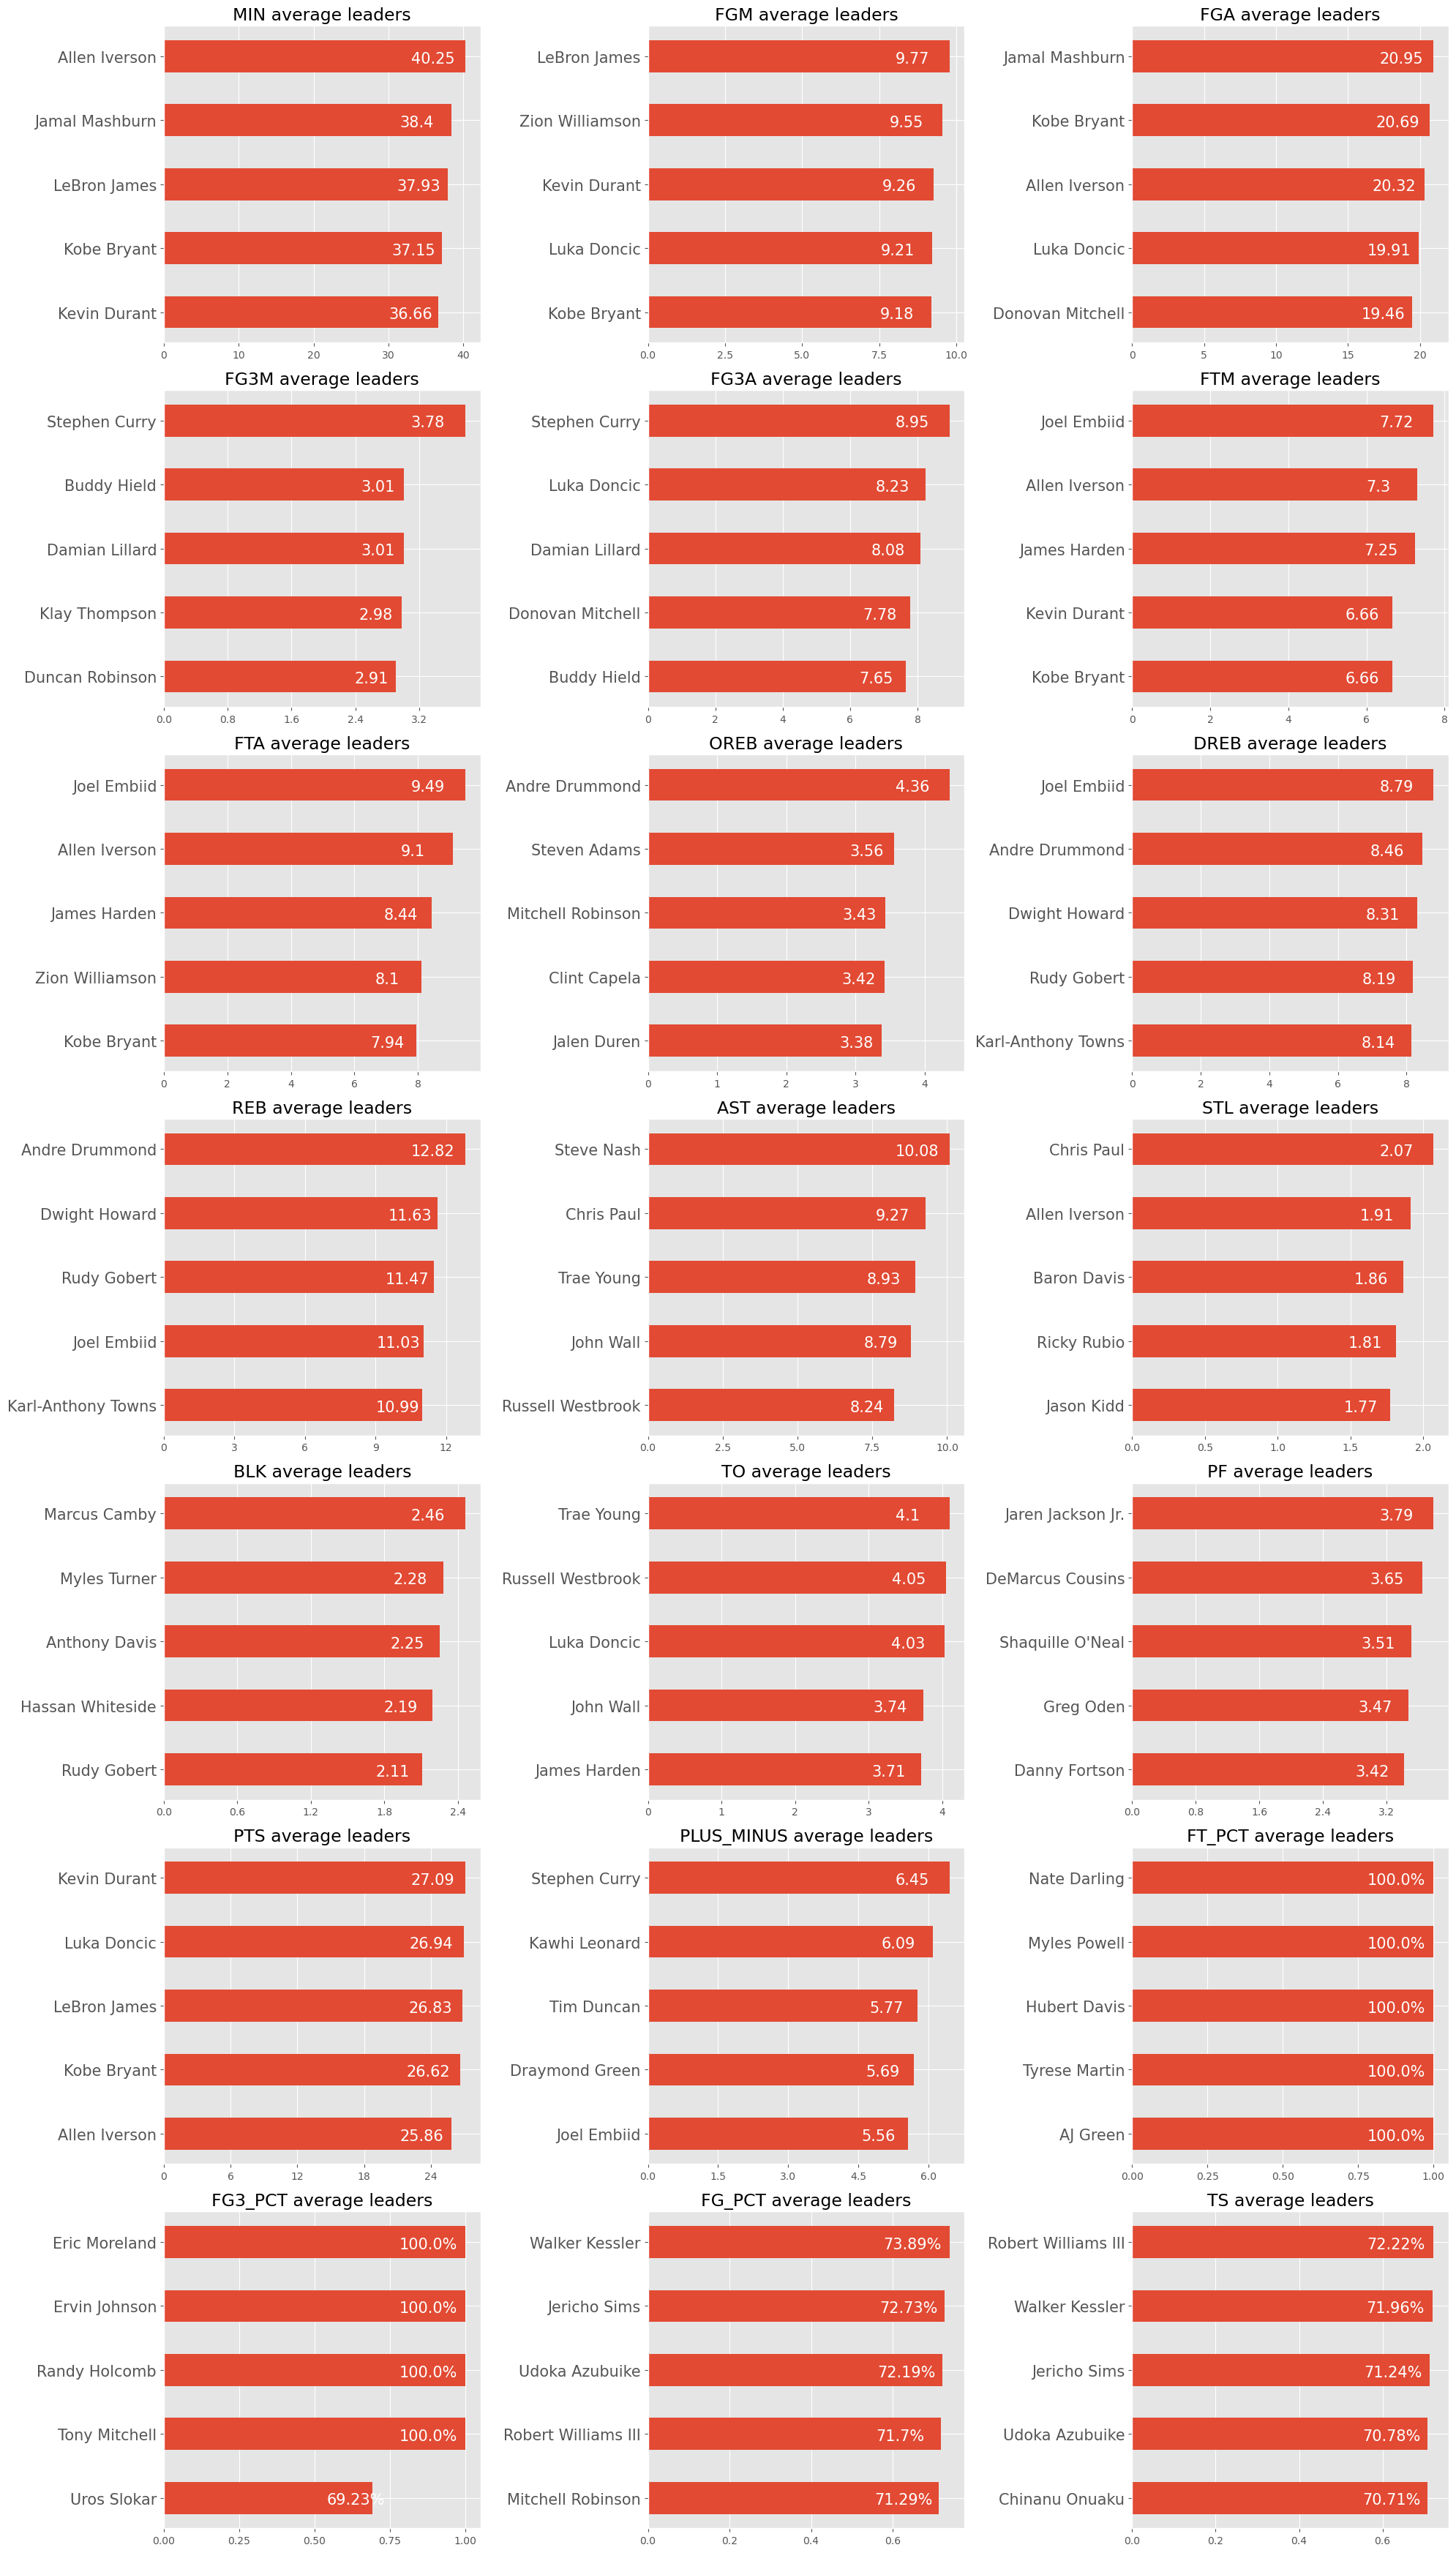

In [52]:
# Visualizing top 5 player in each category

mpl.style.use(['ggplot'])

fig, ax=plt.subplots(nrows=7, ncols=3, figsize=(20, 35))

ax=ax.flatten()

for index, stat in enumerate(stats):
    
    players_avg_5=players_avg.sort_values(stat, ascending=False).head()
    
    players_avg_5=players_avg_5.sort_values(stat)
    
    players_avg_5=players_avg_5[stat]
    
    ax[index].barh(players_avg_5.index, players_avg_5.values, height=0.5)
    
    ax[index].set_title(f"{stat} average leaders", fontsize=17)
    
    for index_1, value in enumerate(players_avg_5):
        
        if value>1:
            ax[index].annotate(round(value, 2), xy=(value*0.82, index_1-0.1), color='white', fontsize=15)
            
        else:
            ax[index].annotate(str(round(value*100, 2))+'%', xy=(value*0.78, index_1-0.1), color='white', fontsize=15)
            
    ax[index].tick_params(axis='y', labelsize=15)
    
    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))

plt.tight_layout()

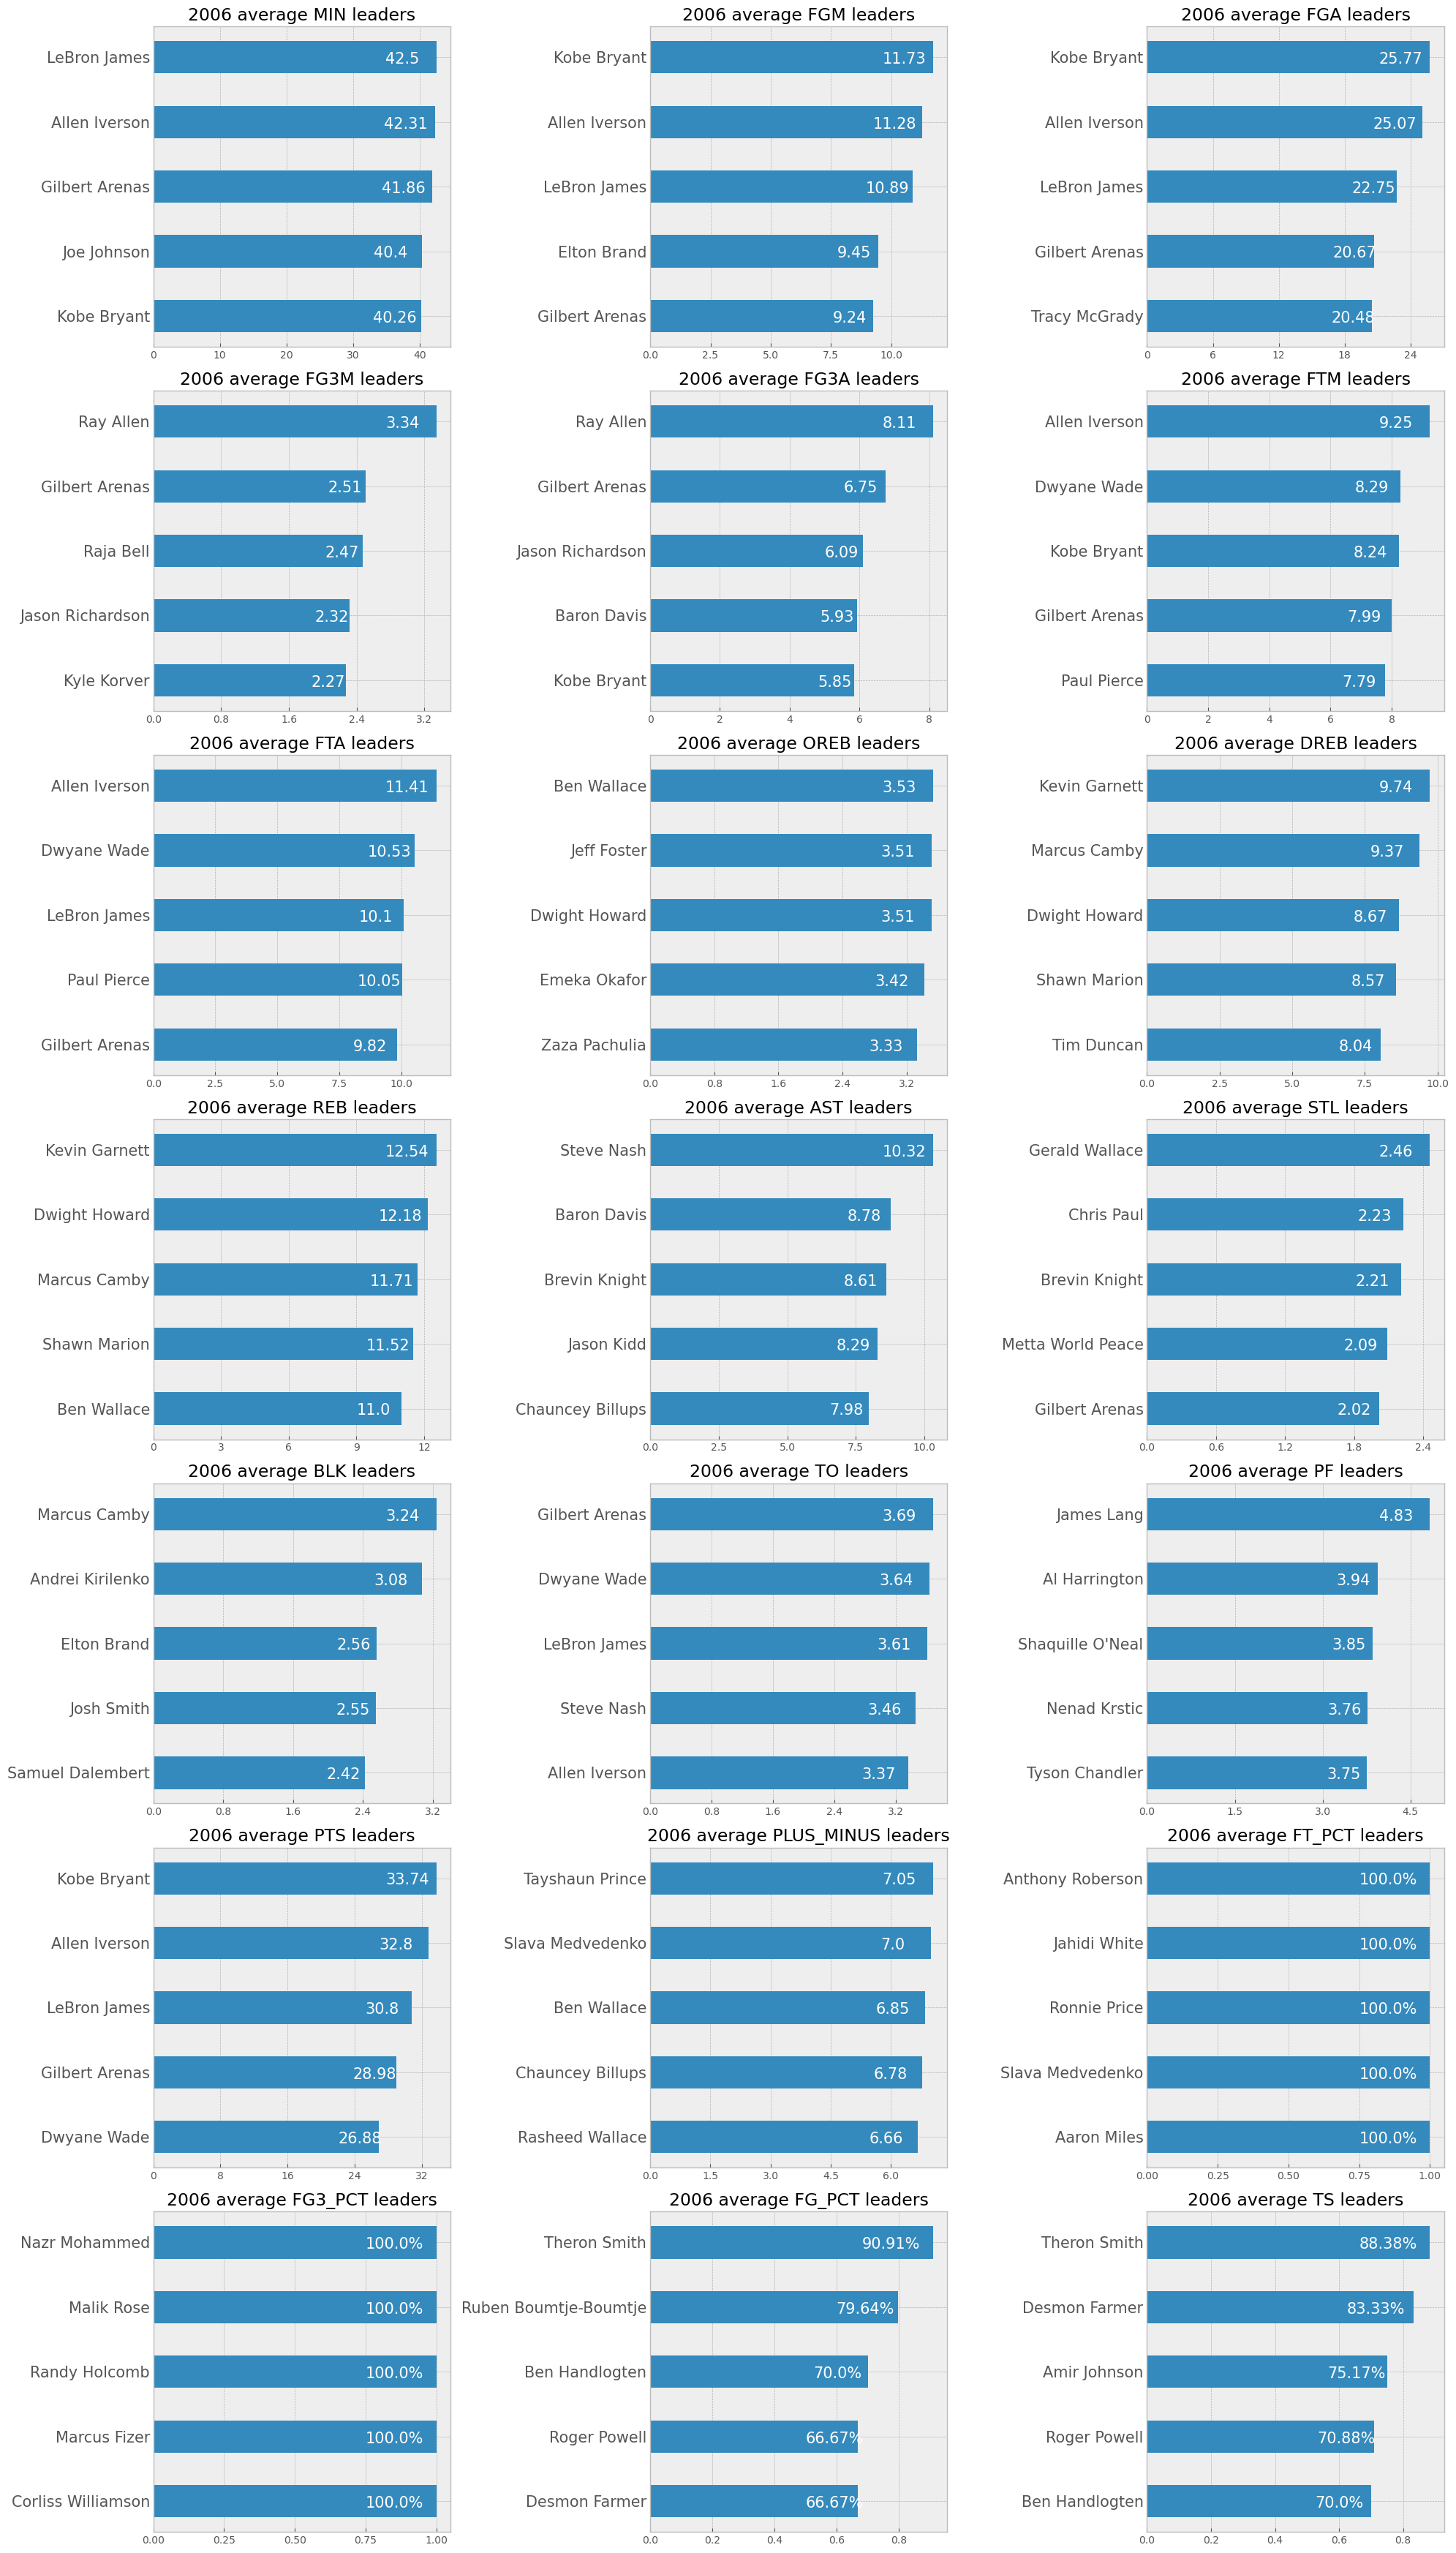

In [53]:
# Visualizing top 5 player in each category in each season

mpl.style.use(['bmh'])

season=2006

players_avg_season=season_player_avg.loc[season]

fig, ax=plt.subplots(nrows=7, ncols=3, figsize=(20, 35))

ax=ax.flatten()

for index, stat in enumerate(stats):
    
    players_avg_5=players_avg_season.sort_values(stat, ascending=False).head()
    
    players_avg_5=players_avg_5.sort_values(stat)
    
    players_avg_5=players_avg_5[stat]
    
    ax[index].barh(players_avg_5.index, players_avg_5.values, height=0.5)
    
    ax[index].set_title(f"{season} average {stat} leaders", fontsize=17)
    
    for index_1, value in enumerate(players_avg_5):
        
        if value>1:
            ax[index].annotate(round(value, 2), xy=(value*0.82, index_1-0.1), color='white', fontsize=15)
            
        else:
            ax[index].annotate(str(round(value*100, 2))+'%', xy=(value*0.75, index_1-0.1), color='white', fontsize=15)
            
    ax[index].tick_params(axis='y', labelsize=15)
    
    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))

plt.tight_layout()

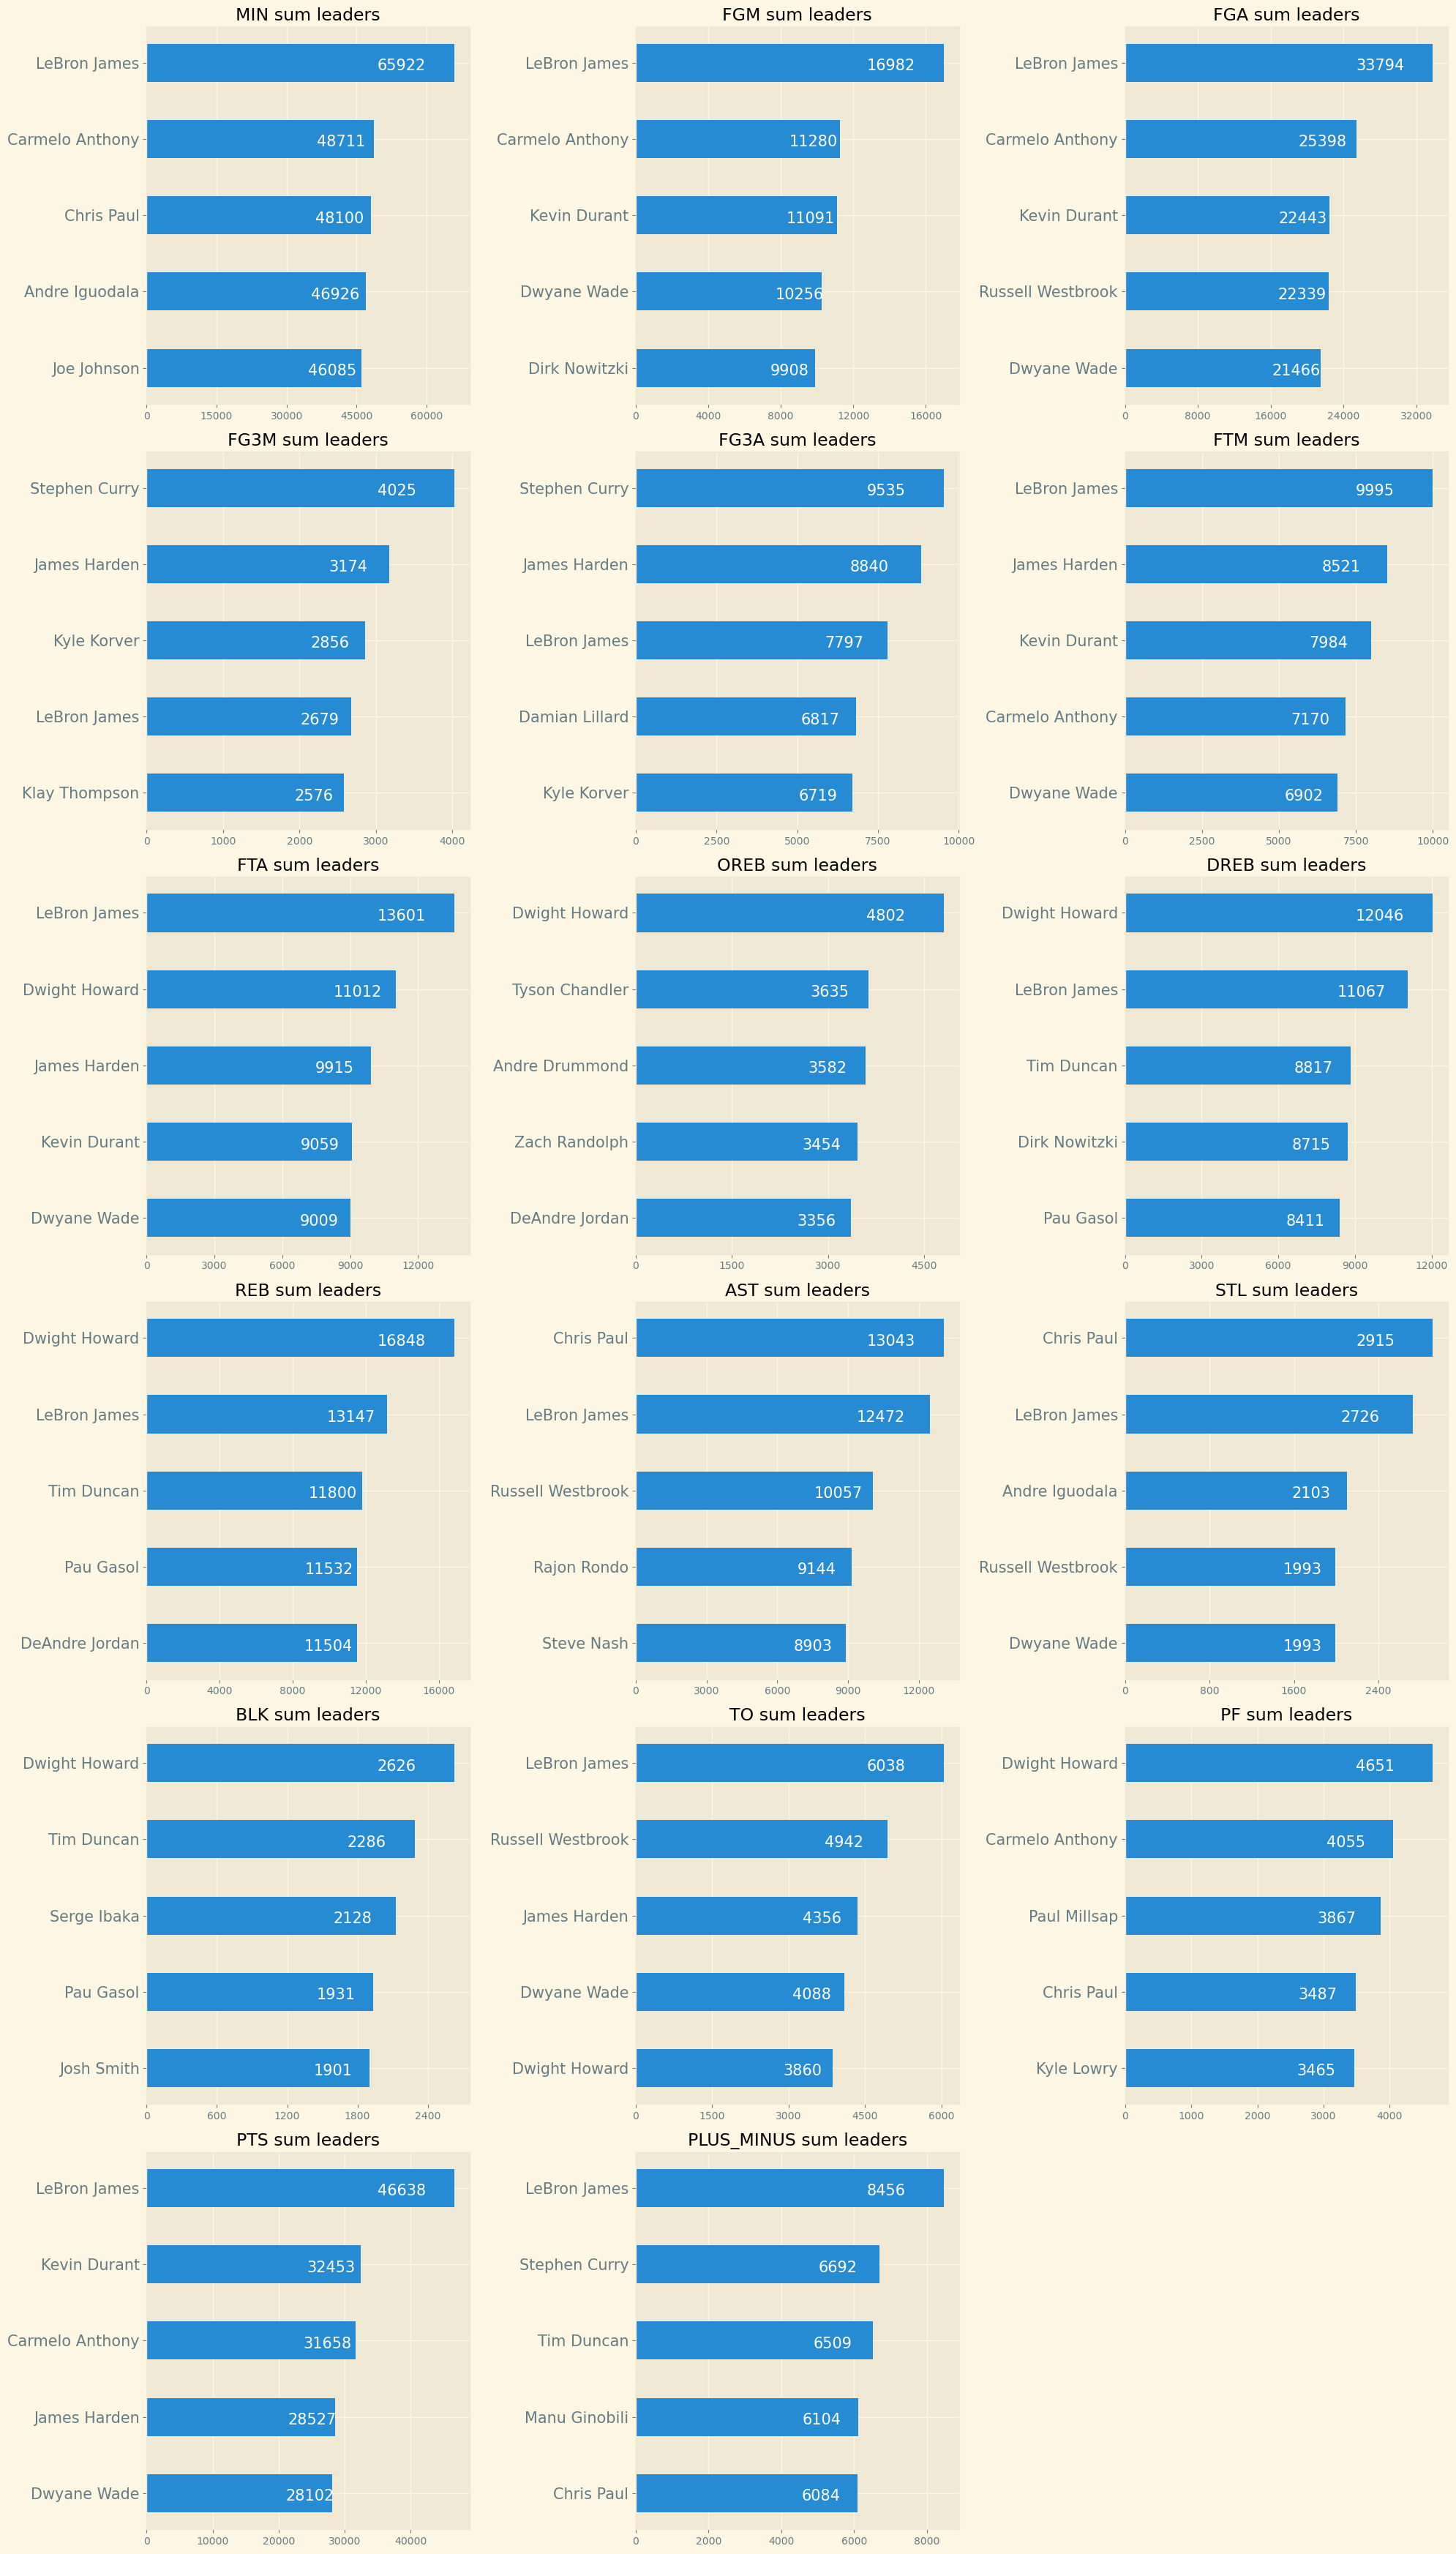

In [54]:
# Visualizing top 5 player in each category (sum)

stats_sum=stats[:-4]

mpl.style.use(['Solarize_Light2'])

fig, ax=plt.subplots(nrows=6, ncols=3, figsize=(20, 35))

ax=ax.flatten()

for index, stat in enumerate(stats_sum):
    
    players_sum_5=players_sum.sort_values(stat, ascending=False).head()
    
    players_sum_5=players_sum_5.sort_values(stat)
    
    players_sum_5=players_sum_5[stat]
    
    ax[index].barh(players_sum_5.index, players_sum_5.values, height=0.5)
    
    ax[index].set_title(f"{stat} sum leaders", fontsize=17)
    
    for index_1, value in enumerate(players_sum_5):

            ax[index].annotate(int(value), xy=(value*0.75, index_1-0.1), color='white', fontsize=15)
            
    ax[index].tick_params(axis='y', labelsize=15)

    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
ax[17].axis('off')

plt.tight_layout()

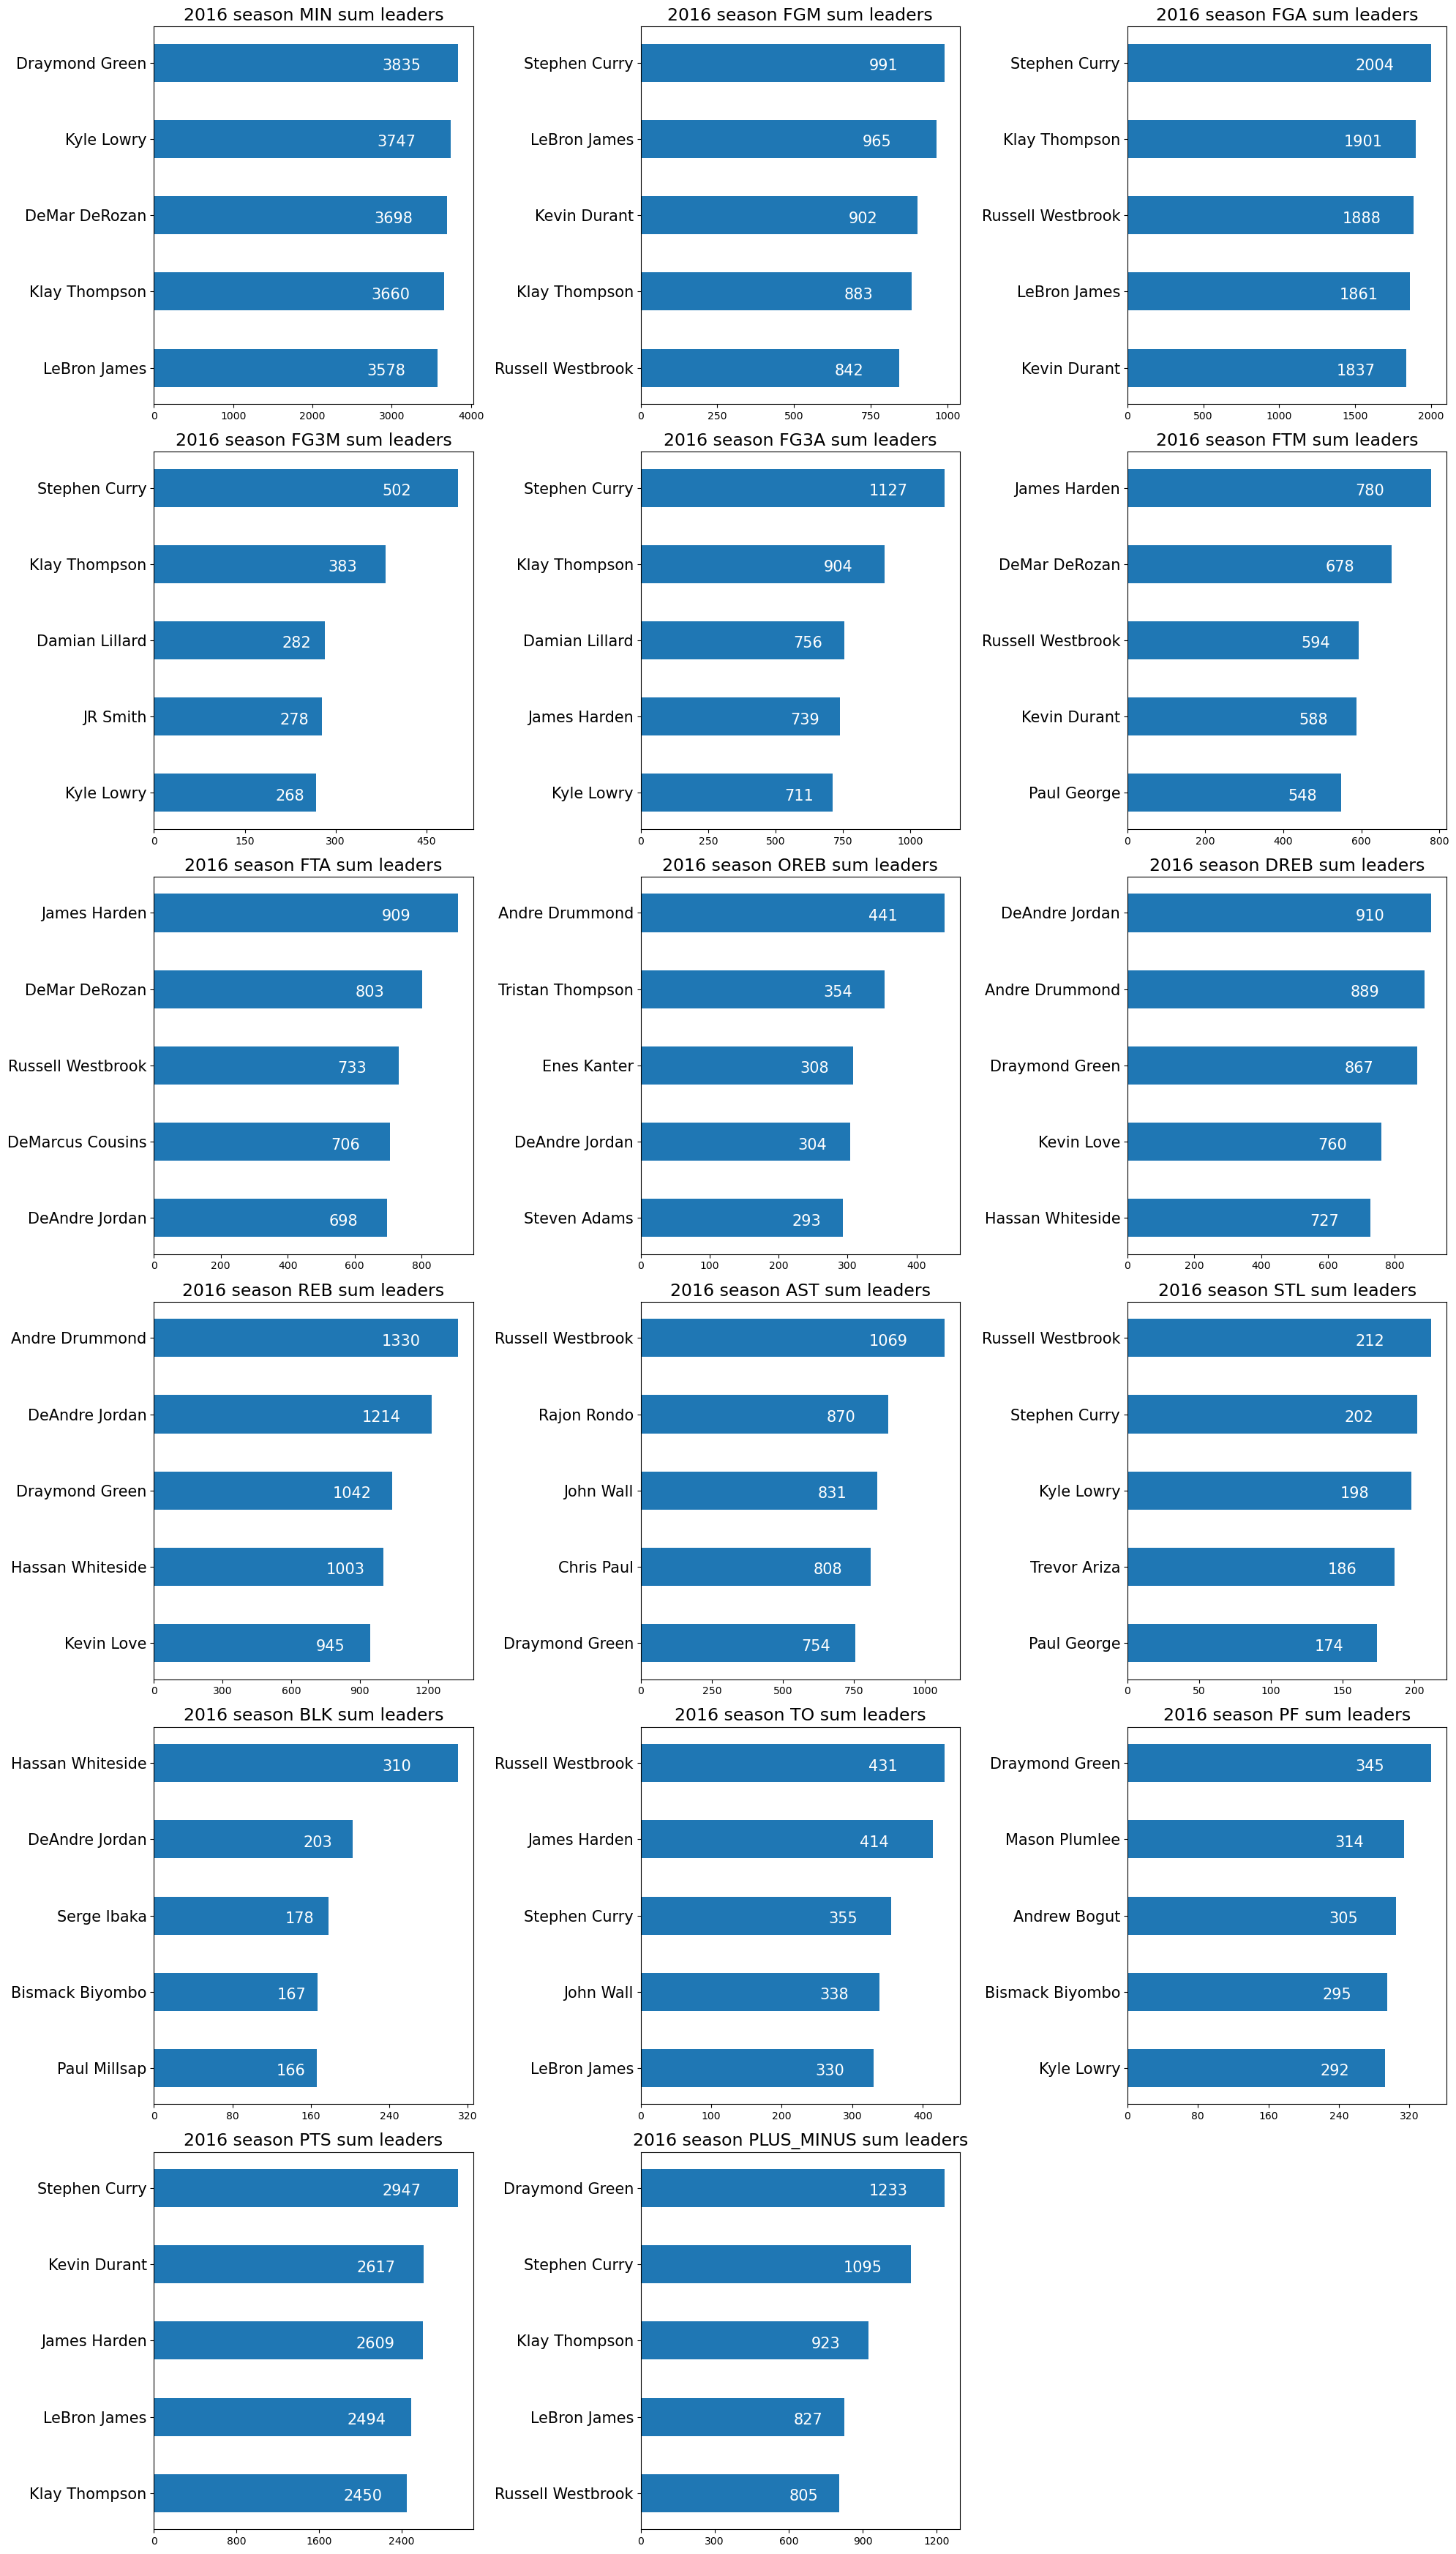

In [55]:
# Visualizing top 5 player in each category in each season (sum)

mpl.style.use(['default'])

season=2016

players_sum_season=players_season_sum.loc[season]

fig, ax=plt.subplots(nrows=6, ncols=3, figsize=(20, 35))

ax=ax.flatten()

for index, stat in enumerate(stats_sum):
    
    players_sum_5=players_sum_season.sort_values(stat, ascending=False).head()
    
    players_sum_5=players_sum_5.sort_values(stat)
    
    players_sum_5=players_sum_5[stat]
    
    ax[index].barh(players_sum_5.index, players_sum_5.values, height=0.5)
    
    ax[index].set_title(f"{season} season {stat} sum leaders", fontsize=17)
    
    for index_1, value in enumerate(players_sum_5):

            ax[index].annotate(int(value), xy=(value*0.75, index_1-0.1), color='white', fontsize=15)
            
    ax[index].tick_params(axis='y', labelsize=15)
    
    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))

ax[17].axis('off')

plt.tight_layout()

# Season averages

In [56]:
# Creating averages dataframe for each season, adding same parameters as before

season_avg=games_details.groupby(['SEASON', 'GAME_ID']).sum(numeric_only=True)
season_avg=season_avg.groupby(["SEASON"]).mean()
season_avg.drop(columns=['TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'FT_PCT', 'FG3_PCT', 'MAT', 'PLUS_MINUS', 'MIN'], inplace=True)
season_avg['FT_PCT']=season_avg['FTM']/season_avg['FTA']
season_avg['FG3_PCT']=season_avg['FG3M']/season_avg['FG3A']
season_avg['FG_PCT']=season_avg['FGM']/season_avg['FGA']
season_avg['TS']=season_avg['PTS']/(2*(season_avg['FGA']+0.44*season_avg['FTA']))
season_avg

FGM         FGA       FG3M       FG3A        FTM        FTA  \
SEASON                                                                      
2004    69.586314  159.052100  10.299378  29.820373  36.426905  48.636081   
2005    71.541116  160.002937  11.174009  31.482379  39.604258  52.492658   
2006    71.240223  157.275140  11.341480  31.821229  39.754888  53.413408   
2007    72.479887  158.693719  12.036697  33.840508  39.780522  53.026817   
2008    73.831325  162.226081  12.943303  35.871013  38.214033  50.709426   
2009    73.548840  160.957133  13.200984  36.151089  38.551651  50.302178   
2010    74.704354  162.445225  12.801966  36.221910  38.189607  50.457865   
2011    73.680028  161.554149  12.843882  35.995781  37.937412  49.762307   
2012    72.470109  162.255435  12.706522  36.652174  34.174819  45.472826   
2013    73.711268  163.515493  14.261268  39.976056  33.811972  45.037324   
2014    74.758935  165.210231  15.430974  43.091801  36.047652  47.812894   
2015    74.616361  166.680536  15.752468  45.114245  34.922426  46.762341   
2016    75.860876  168.718220  17.075565  48.491525  35.680085  47.281780   
2017    77.729922  170.470505  19.258706  54.037669  36.000000  46.750533   
2018    78.866619  171.754146  20.993511  58.199712  33.456381  43.720981   
2019    81.682713  178.055434  22.660102  64.037929  35.838804  46.772429   
2020    81.082524  176.894822  24.516990  68.703074  36.091424  46.785599   
2021    85.108571  183.646531  26.355102  72.330612  35.484082  45.764082   
2022    80.825899  175.808633  24.879137  70.468345  33.856835  43.756835   
2023    82.129390  176.107209  24.336414  68.900185  37.005545  47.571165   

             OREB       DREB        REB        AST        STL        BLK  \
SEASON                                                                     
2004    24.067652  60.290047  84.357698  42.293935  15.896579  10.105754   
2005    23.931718  59.541850  83.473568  42.149046  15.052863   9.763583   
2006    22.301676  59.469274  81.770950  40.842179  14.505587   9.354749   
2007    22.273818  59.787579  82.061397  42.220889  14.657022   9.143966   
2008    22.405386  61.442240  83.847626  43.075833  14.625797   9.523742   
2009    21.910752  60.563598  82.474350  41.611384  14.786367   9.622628   
2010    21.840590  61.396067  83.236657  42.144663  14.554073   9.724017   
2011    21.823488  60.945851  82.769339  42.509142  14.819972   9.800281   
2012    22.623188  61.658514  84.281703  41.495471  15.355072  10.253623   
2013    22.311972  61.993662  84.305634  43.823944  15.643662  10.233099   
2014    21.735109  63.644709  85.379818  43.571128  15.434478   9.428872   
2015    21.703103  64.988011  86.691114  43.948519  15.618477   9.643159   
2016    20.852401  66.795198  87.647599  44.086158  15.747175   9.885593   
2017    20.224591  66.815920  87.040512  45.095238  15.577114   9.481166   
2018    19.278298  67.743331  87.021629  46.260995  15.489546   9.622927   
2019    20.670314  69.743253  90.413567  48.868709  15.277170   9.926331   
2020    19.936084  69.734628  89.670712  48.498382  15.381877   9.746764   
2021    20.407347  71.834286  92.241633  51.061224  15.757551  10.066122   
2022    20.541007  68.299281  88.840288  48.996403  15.348201   9.484173   
2023    21.057301  66.750462  87.807763  49.536044  15.038817   9.645102   

               TO         PF         PTS    FT_PCT   FG3_PCT    FG_PCT  \
SEASON                                                                   
2004    28.554432  43.227061  185.898911  0.748969  0.345381  0.437506   
2005    27.862702  45.658590  193.854626  0.754472  0.354929  0.447124   
2006    28.045391  46.352654  193.578911  0.744287  0.356412  0.452966   
2007    29.634439  45.275229  196.776994  0.750196  0.355689  0.456728   
2008    27.471297  42.840539  198.819986  0.753588  0.360829  0.455114   
2009    27.335910  42.808152  198.850316  0.766401  0.365161  0.456947   
2010    27.528792  42.837781  200.400281  0.756861  0.

(0.0, 1.0, 0.0, 1.0)

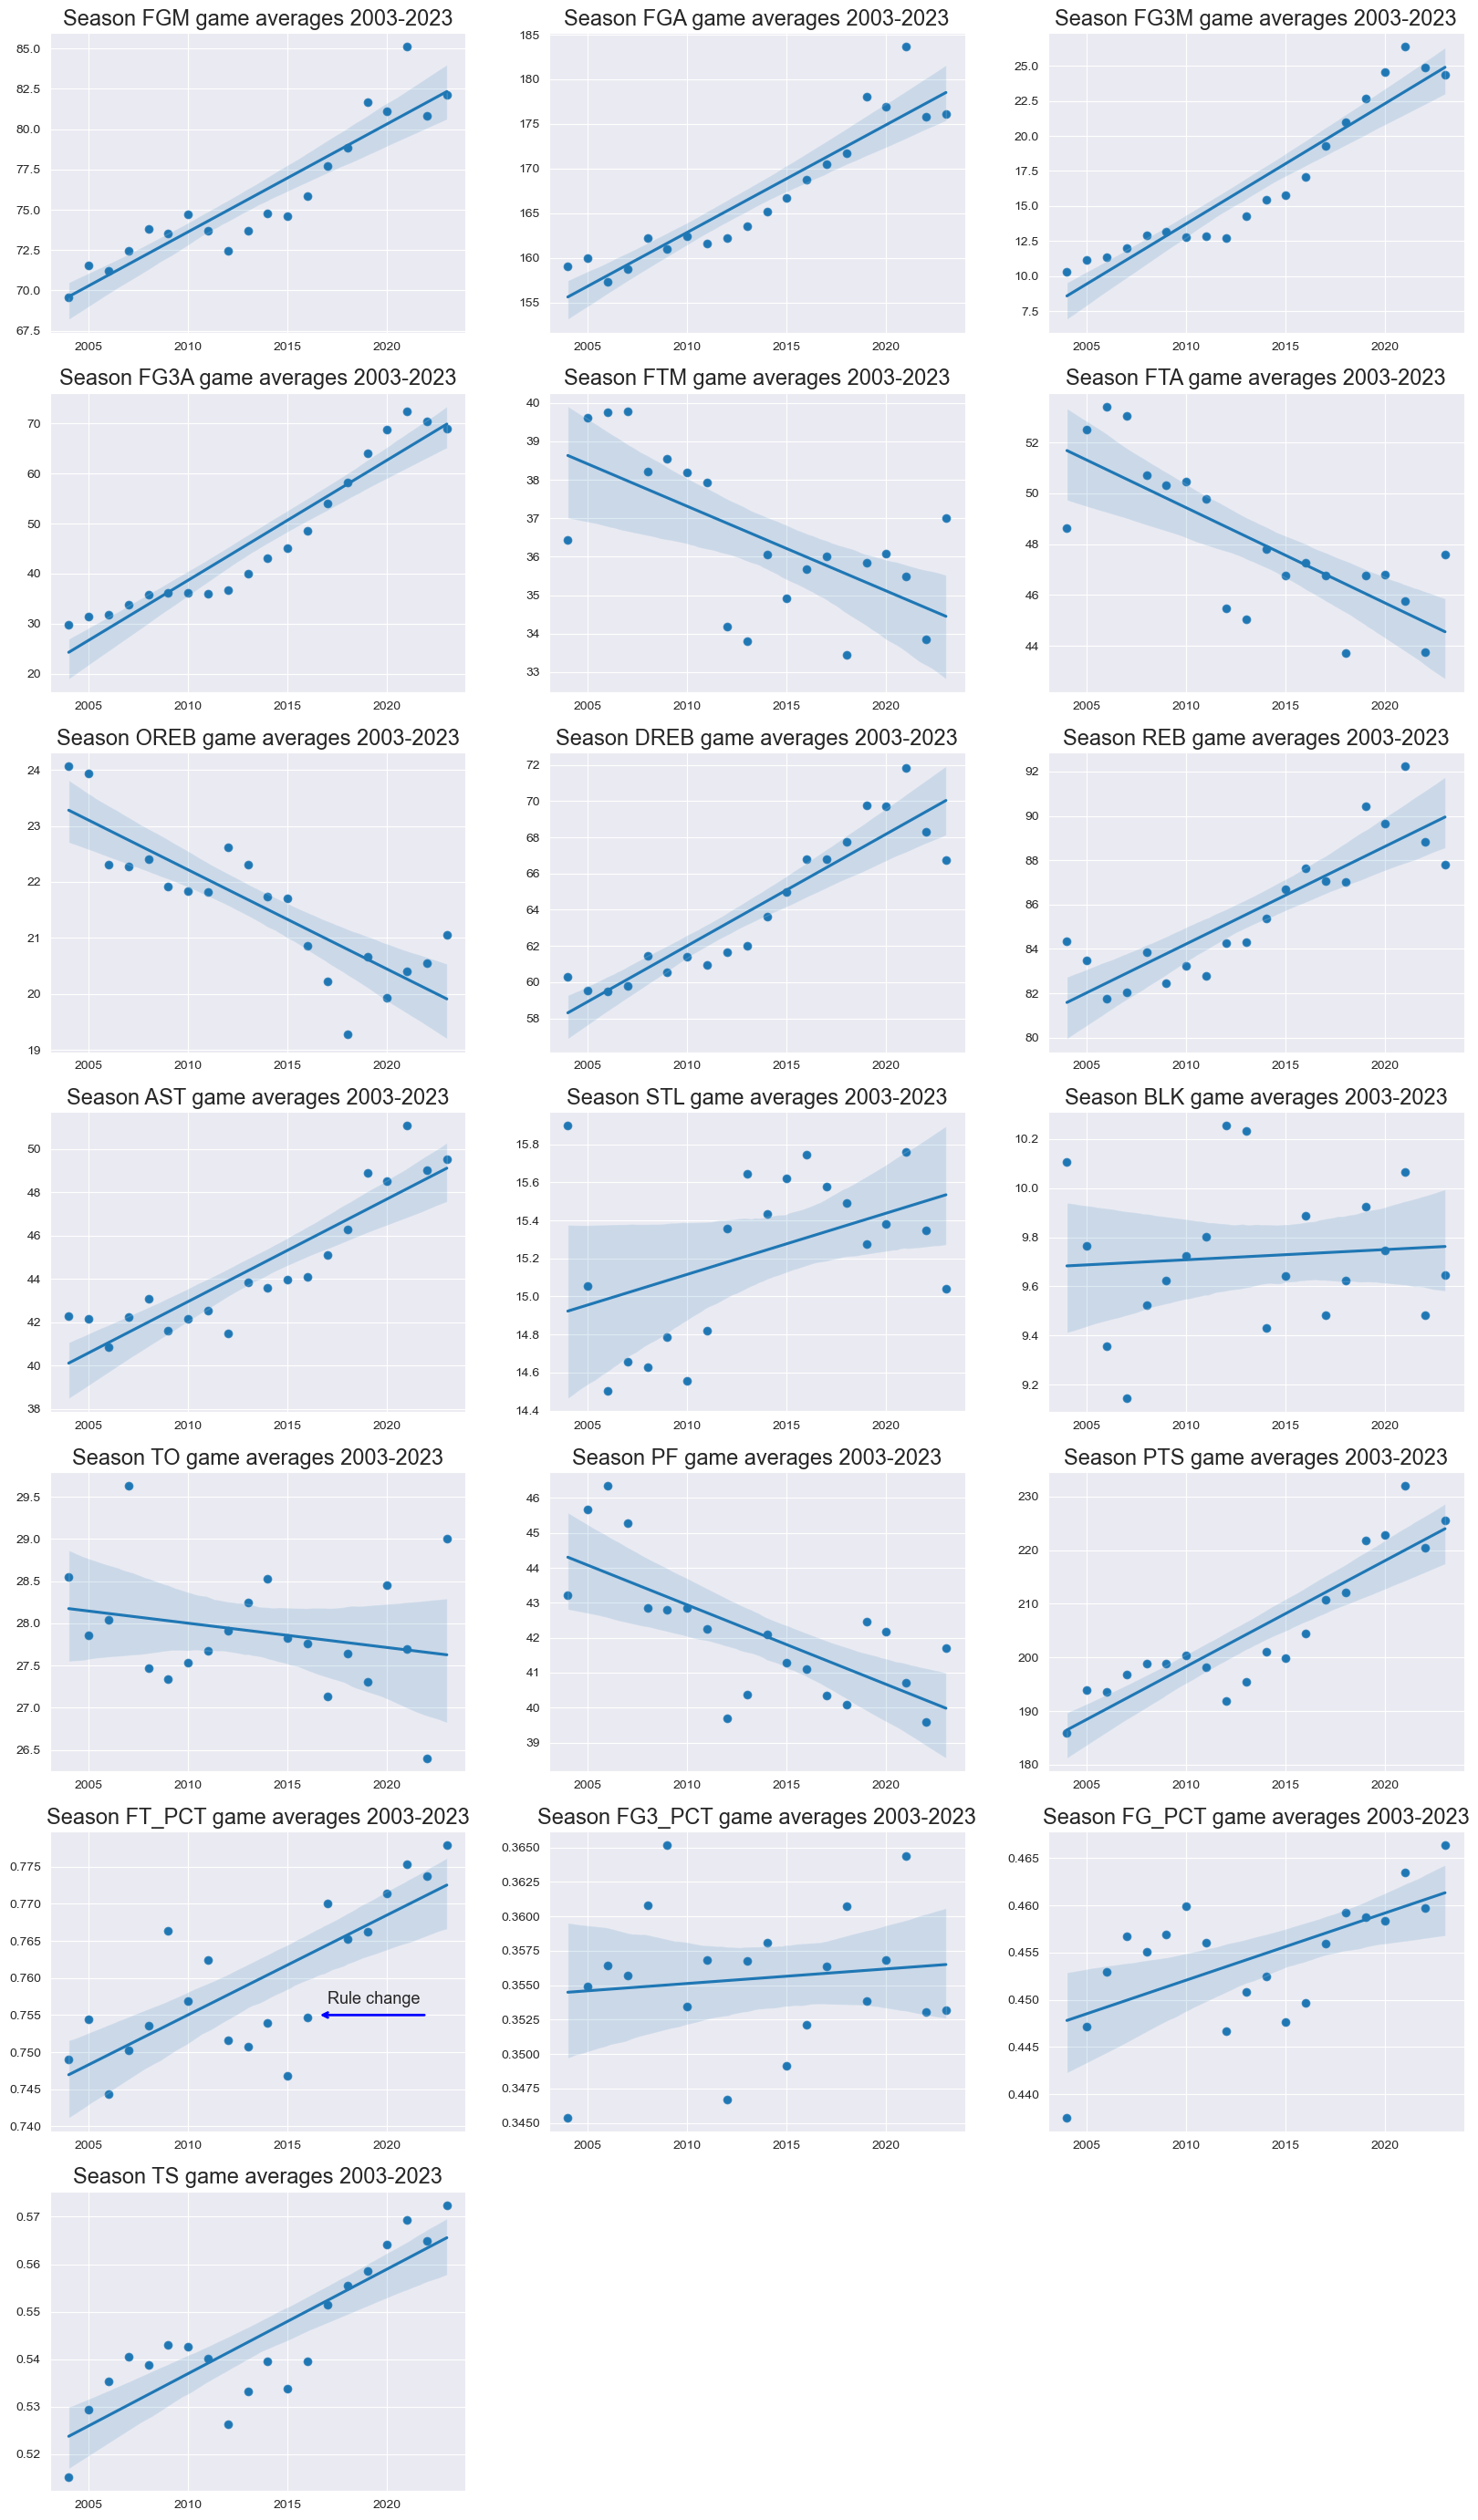

In [57]:
# Visualizing overall league trends

sns.set_style("darkgrid")

stats_season=list(season_avg.columns)

fig, ax=plt.subplots(nrows=7, ncols=3, figsize=(20, 35))

ax=ax.flatten()

season_avg['SEA']=list(season_avg.index)

for index, stat in enumerate(stats_season):
    
    sns.scatterplot(x=season_avg.index, y=season_avg[stat], ax=ax[index])
    
    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
    ax[index].set_title(f"Season {stat} game averages 2003-2023", fontsize=17)
    
    sns.regplot(data=season_avg, x="SEA", y=stat, ax=ax[index])
    
    ax[index].set_xlabel('')
    
    ax[index].set_ylabel('')
    
    if stat=='FT_PCT':
        
        ax[index].annotate('',  
             xy=(2016.5, 0.755),  
             xytext=(2022, 0.755),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )
        
        ax[index].annotate('Rule change',
             xy=(2017, 0.756),
             rotation=0,
             va='bottom',
             ha='left',
             fontsize=13              
             )
    
ax[19].axis('off')

ax[20].axis('off')            

# Direct player comparisons

In [58]:
# Selecting players to compare
player1='LeBron James'
player2='Kevin Durant'

players_avg_norm=(players_avg - players_avg.min()) / (players_avg.max() - players_avg.min())

two_players=players_avg_norm.loc[[player1, player2],['PTS', 'REB', 'AST', 'STL', 'BLK']]

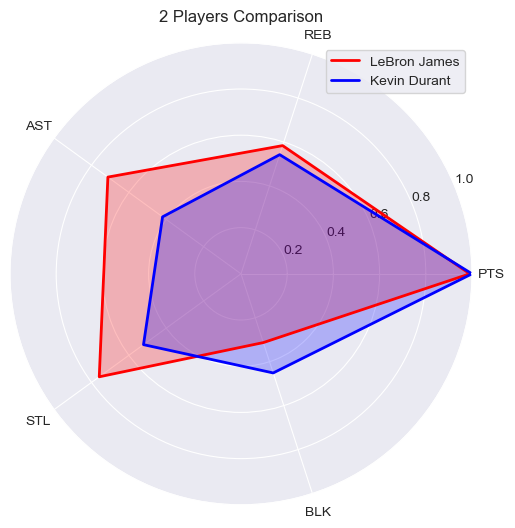

In [59]:
labels = ['PTS', 'REB', 'AST', 'STL', 'BLK'] # Setting stats to compare

player1_stats = two_players.iloc[0].values.tolist()
player2_stats = two_players.iloc[1].values.tolist()

angles = np.linspace(0, 2 * np.pi, 5, endpoint=False).tolist() # Creating circle

player1_stats += player1_stats[:1]
angles += angles[:1]
player2_stats += player2_stats[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.set_ylim(0, 1)

ax.plot(angles, player1_stats, color='red', linewidth=2) #creating lines
ax.plot(angles, player2_stats, color='blue', linewidth=2)
ax.fill(angles, player1_stats, color='red', alpha=0.25) # Filling the box
ax.fill(angles, player2_stats, color='blue', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('2 Players Comparison')
plt.legend([player1, player2], loc='upper right')
plt.show()

# Team analysis

In [60]:
# Adding season column to ranking dataframe

for index, row in ranking.iterrows():
    year=str(ranking.at[index, 'STANDINGSDATE'])[:4]
    month=str(ranking.at[index, 'STANDINGSDATE'])[5:7]
    if int(month)>9:
        ranking.at[index, 'SEASON']=int(int(year)+1)
    else:
        ranking.at[index, 'SEASON']=int(year) 

In [61]:
ranking

TEAM_ID  LEAGUE_ID  SEASON_ID STANDINGSDATE CONFERENCE  \
0       1610612743          0      22022    2022-12-22       West   
1       1610612763          0      22022    2022-12-22       West   
2       1610612740          0      22022    2022-12-22       West   
3       1610612756          0      22022    2022-12-22       West   
4       1610612746          0      22022    2022-12-22       West   
...            ...        ...        ...           ...        ...   
210337  1610612765          0      22013    2014-09-01       East   
210338  1610612738          0      22013    2014-09-01       East   
210339  1610612753          0      22013    2014-09-01       East   
210340  1610612755          0      22013    2014-09-01       East   
210341  1610612749          0      22013    2014-09-01       East   

                TEAM   G   W   L  W_PCT HOME_RECORD ROAD_RECORD  RETURNTOPLAY  \
0             Denver  30  19  11  0.633        10-3         9-8           NaN   
1            Memphis  30  19  11  0.633        13-2         6-9           NaN   
2        New Orleans  31  19  12  0.613        13-4         6-8           NaN   
3            Phoenix  32  19  13  0.594        14-4         5-9           NaN   
4        LA Clippers  33  19  14  0.576        11-7         8-7           NaN   
...              ...  ..  ..  ..    ...         ...         ...           ...   
210337       Detroit  82  29  53  0.354       17-24       12-29           NaN   
210338        Boston  82  25  57  0.305       16-25        9-32           NaN   
210339       Orlando  82  23  59  0.280       19-22        4-37           NaN   
210340  Philadelphia  82  19  63  0.232       10-31        9-32           NaN   
210341     Milwaukee  82  15  67  0.183       10-31        5-36           NaN   

        SEASON  
0       2023.0  
1       2023.0  
2       2023.0  
3       2023.0  
4       2023.0  
...        ...  
210337  2014.0  
210338  2014.0  
210339  2014.0  
210340  2014.0  
210341  2014.0  

[210342 rows x 14 columns]

In [62]:
# Unifying team names

team_dict={'LA Lakers': 'L.A. Lakers', 'LA Clippers': 'L.A. Clippers', "New Orleans/Oklahoma City":'New Orleans', 'New Jersey':'Brooklyn'}
ranking['TEAM']=ranking['TEAM'].replace(team_dict)
ranking['TEAM'].value_counts()

TEAM
Dallas           7026
Milwaukee        7025
Houston          7025
Washington       7025
New York         7025
Boston           7025
Memphis          7025
Minnesota        7025
Golden State     7025
Chicago          7024
Miami            7024
Denver           7024
L.A. Lakers      7023
San Antonio      7023
Detroit          7023
New Orleans      7023
Orlando          7023
Phoenix          7023
Toronto          7023
L.A. Clippers    7023
Indiana          7023
Atlanta          7023
Sacramento       7023
Philadelphia     7023
Brooklyn         7023
Cleveland        7023
Utah             7023
Portland         7023
Charlotte        6649
Oklahoma City    5196
Seattle          1831
Name: count, dtype: int64

In [63]:
# For each season-team pair assigning the final performance, with regular season wins etc

team_season_dict={}

for index, row in ranking.iterrows():
    
    if row['SEASON']==2021:
        
        if row['G']==72:
    
            if (row['TEAM'], row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(row['TEAM'], row['SEASON'])]=[row['G'], row['W'], row['L'], 
                                                                row['W_PCT'], row['HOME_RECORD'], row['ROAD_RECORD']]
    
    elif row['SEASON']==2020:
        
        if row['G']==64:
    
            if (row['TEAM'], row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(row['TEAM'], row['SEASON'])]=[row['G'], row['W'], row['L'], 
                                                                row['W_PCT'], row['HOME_RECORD'], row['ROAD_RECORD']]
            
            
    elif row['SEASON']==2013:
        
        if row['TEAM']=='Boston' or row['TEAM']=='Indiana':
            
            if row['G']==81:
                
                if (row['TEAM'], row['SEASON']) in team_season_dict.keys():

                    continue

                else:

                    team_season_dict[(row['TEAM'], row['SEASON'])]=[row['G'], row['W'], row['L'], 
                                                                row['W_PCT'], row['HOME_RECORD'], row['ROAD_RECORD']]
        
        elif row['G']==82:
    
            if (row['TEAM'], row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(row['TEAM'], row['SEASON'])]=[row['G'], row['W'], row['L'], 
                                                                row['W_PCT'], row['HOME_RECORD'], row['ROAD_RECORD']]
    
    else:
        
        if row['G']==82:
    
            if (row['TEAM'], row['SEASON']) in team_season_dict.keys():

                continue

            else:

                team_season_dict[(row['TEAM'], row['SEASON'])]=[row['G'], row['W'], row['L'], 
                                                                row['W_PCT'], row['HOME_RECORD'], row['ROAD_RECORD']]
            

In [64]:
# Assigning each team the division name it belongs to

division_teams = {
    'Boston': 'Atlantic',
    'Brooklyn': 'Atlantic',
    'New York': 'Atlantic',
    'Philadelphia': 'Atlantic',
    'Toronto': 'Atlantic',
    'Chicago': 'Central',
    'Cleveland': 'Central',
    'Detroit': 'Central',
    'Indiana': 'Central',
    'Milwaukee': 'Central',
    'Atlanta': 'Southeast',
    'Charlotte': 'Southeast',
    'Miami': 'Southeast',
    'Orlando': 'Southeast',
    'Washington': 'Southeast',
    'Denver': 'Northwest',
    'Minnesota': 'Northwest',
    'Oklahoma City': 'Northwest',
    'Seattle':'Northwest',
    'Portland': 'Northwest',
    'Utah': 'Northwest',
    'Golden State': 'Pacific',
    'L.A. Clippers': 'Pacific',
    'L.A. Lakers': 'Pacific',
    'Phoenix': 'Pacific',
    'Sacramento': 'Pacific',
    'Dallas': 'Southwest',
    'Houston': 'Southwest',
    'Memphis': 'Southwest',
    'New Orleans': 'Southwest',
    'San Antonio': 'Southwest'
}
divisions_list=list(set(division_teams.values()))

In [65]:
# Creating dataframe with data from team_season_dict

team_season = pd.DataFrame.from_dict(team_season_dict, orient='index')
team_season.columns=['G', 'W', 'L', 'W_PCT', 'HOME_RECORD', 'ROAD_RECORD']
teams=[idx[0] for idx in team_season.index]
seasons=[idx[1] for idx in team_season.index]
team_season['TEAM']=teams
team_season['SEASON']=seasons
team_season.reset_index(inplace=True)
team_season.drop(columns=['index'], inplace=True)
boston14=[82, 25, 57, 0.305, "16-25", "9-32", 'Boston', 2014] # Boston and Indiana played 1 game less this season
indiana14=[82, 56, 26, 0.680, "35-6", "21-20", 'Indiana', 2014]
team_season.loc[len(team_season)] = boston14
team_season.loc[len(team_season)] = indiana14
for index, row in team_season.iterrows():
    home_wins, home_losses=str(team_season.at[index, 'HOME_RECORD']).split('-')
    road_wins, road_losses=str(team_season.at[index, 'ROAD_RECORD']).split('-')
    team_season.at[index, 'HOME_WINS']=int(home_wins)
    team_season.at[index, 'ROAD_WINS']=int(road_wins)
team_season['DIVISION']=team_season['TEAM'].map(division_teams)

team_season

G   W   L  W_PCT HOME_RECORD ROAD_RECORD          TEAM  SEASON  \
0    82  64  18  0.780        32-9        32-9       Phoenix  2022.0   
1    82  56  26  0.683       30-11       26-15       Memphis  2022.0   
2    82  53  29  0.646       31-10       22-19  Golden State  2022.0   
3    82  52  30  0.634       29-12       23-18        Dallas  2022.0   
4    82  49  33  0.598       29-12       20-21          Utah  2022.0   
..   ..  ..  ..    ...         ...         ...           ...     ...   
567  82  25  57  0.305       13-28       12-29       Orlando  2015.0   
568  82  18  64  0.220       12-29        6-35  Philadelphia  2015.0   
569  82  17  65  0.207       10-31        7-34      New York  2015.0   
570  82  25  57  0.305       16-25        9-32        Boston  2014.0   
571  82  56  26  0.680        35-6       21-20       Indiana  2014.0   

     HOME_WINS  ROAD_WINS   DIVISION  
0         32.0       32.0    Pacific  
1         30.0       26.0  Southwest  
2         31.0       22.0    Pacific  
3         29.0       23.0  Southwest  
4         29.0       20.0  Northwest  
..         ...        ...        ...  
567       13.0       12.0  Southeast  
568       12.0        6.0   Atlantic  
569       10.0        7.0   Atlantic  
570       16.0        9.0   Atlantic  
571       35.0       21.0    Central  

[572 rows x 11 columns]

In [66]:
team_season

G   W   L  W_PCT HOME_RECORD ROAD_RECORD          TEAM  SEASON  \
0    82  64  18  0.780        32-9        32-9       Phoenix  2022.0   
1    82  56  26  0.683       30-11       26-15       Memphis  2022.0   
2    82  53  29  0.646       31-10       22-19  Golden State  2022.0   
3    82  52  30  0.634       29-12       23-18        Dallas  2022.0   
4    82  49  33  0.598       29-12       20-21          Utah  2022.0   
..   ..  ..  ..    ...         ...         ...           ...     ...   
567  82  25  57  0.305       13-28       12-29       Orlando  2015.0   
568  82  18  64  0.220       12-29        6-35  Philadelphia  2015.0   
569  82  17  65  0.207       10-31        7-34      New York  2015.0   
570  82  25  57  0.305       16-25        9-32        Boston  2014.0   
571  82  56  26  0.680        35-6       21-20       Indiana  2014.0   

     HOME_WINS  ROAD_WINS   DIVISION  
0         32.0       32.0    Pacific  
1         30.0       26.0  Southwest  
2         31.0       22.0    Pacific  
3         29.0       23.0  Southwest  
4         29.0       20.0  Northwest  
..         ...        ...        ...  
567       13.0       12.0  Southeast  
568       12.0        6.0   Atlantic  
569       10.0        7.0   Atlantic  
570       16.0        9.0   Atlantic  
571       35.0       21.0    Central  

[572 rows x 11 columns]

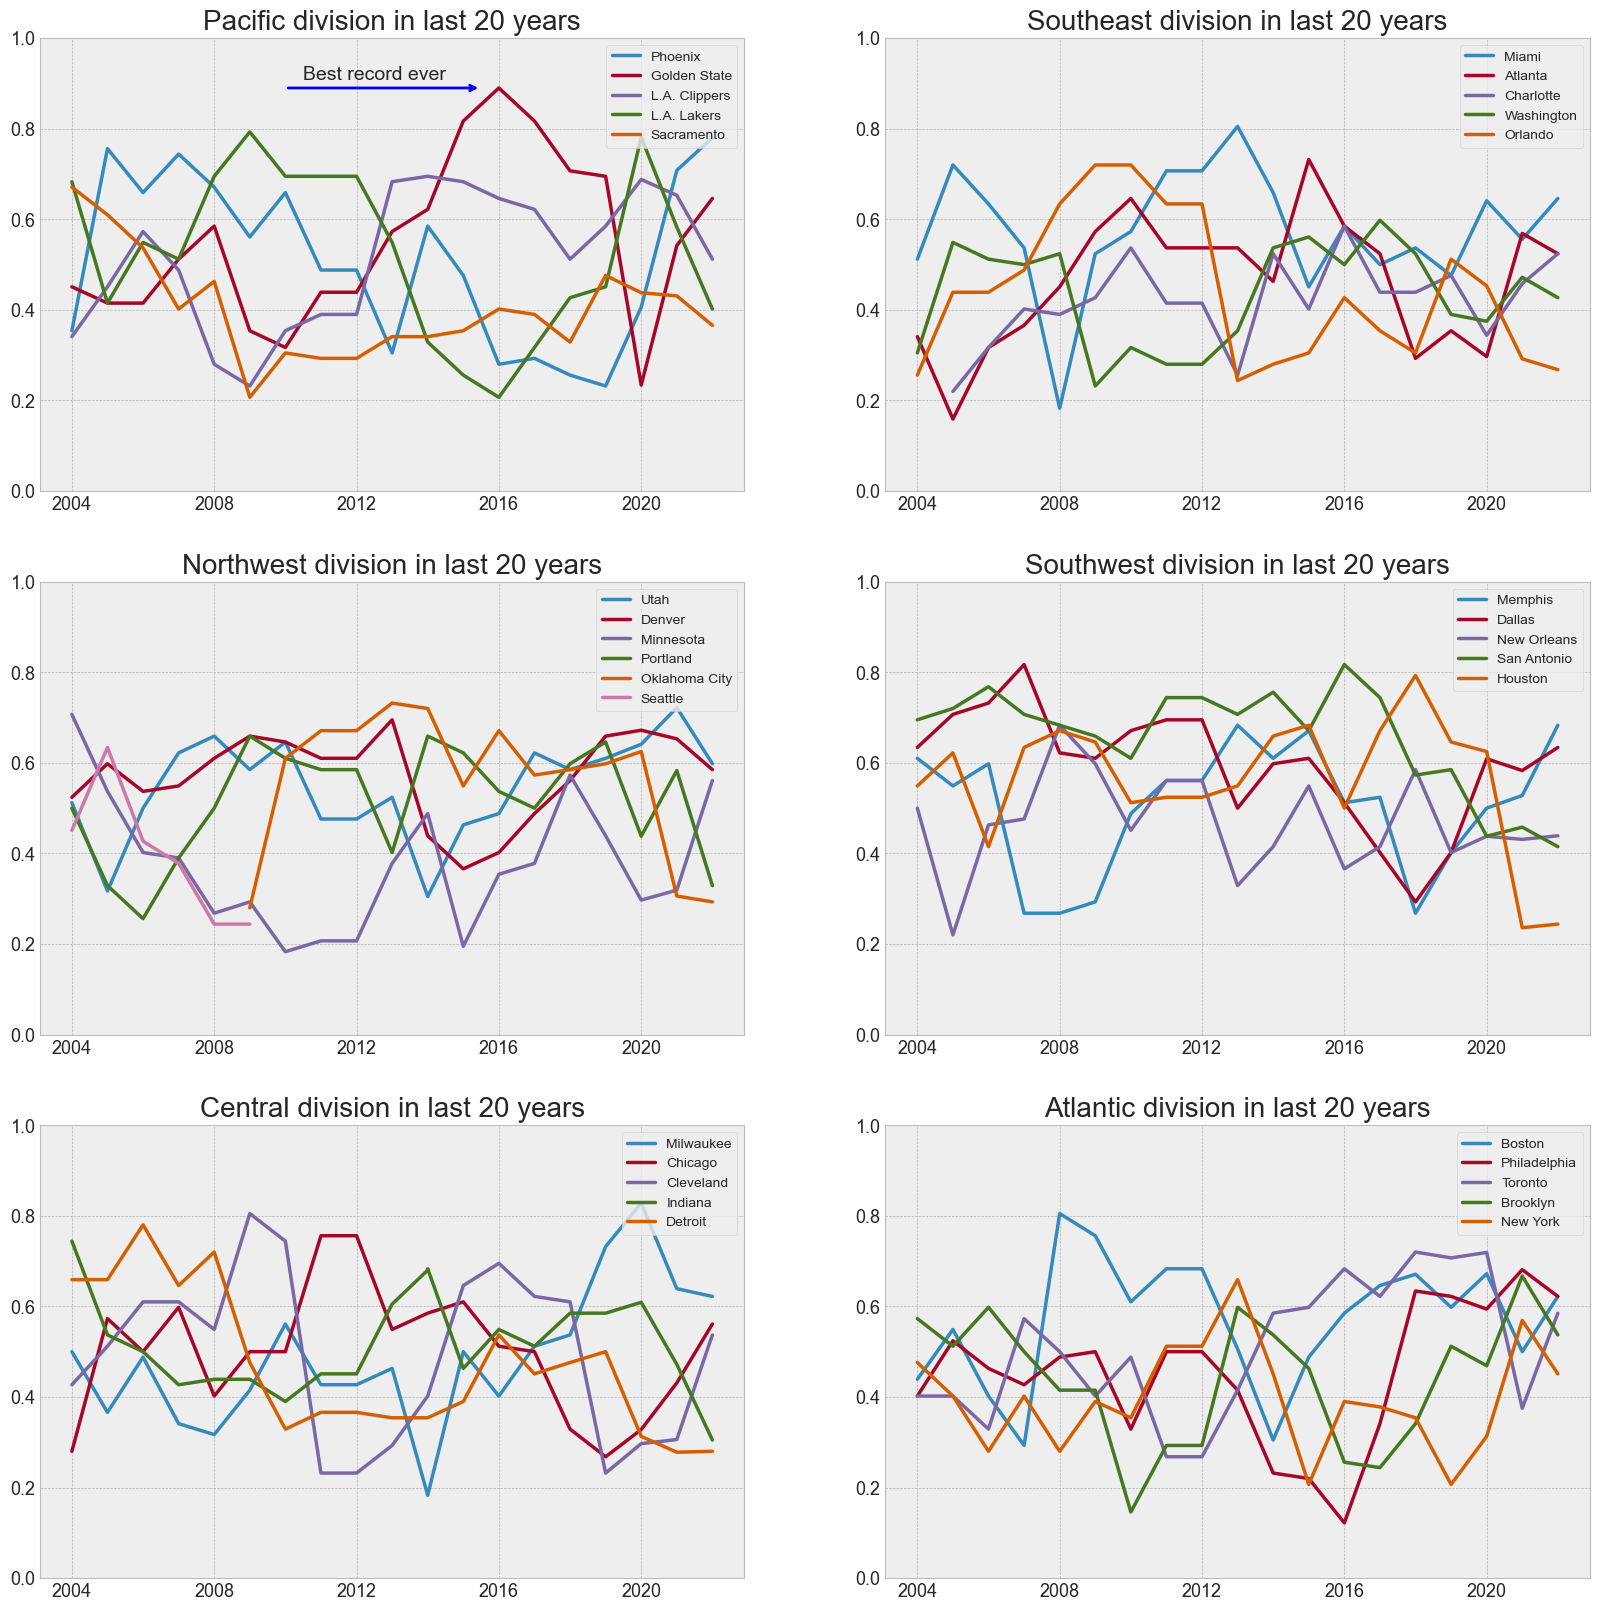

In [67]:
# Performance of teams divided by divisions in last 20 years, the division split was made for better visibility

win_type='W_PCT'

mpl.style.use(["bmh"])

fig, ax=plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

ax=ax.flatten()

for index, division in enumerate(divisions_list):
    
    division_df=team_season.loc[team_season['DIVISION']==division]
    
    division_teams=list(division_df['TEAM'].unique())
    
    for team in division_teams:
        
        team_df=division_df.loc[division_df['TEAM']==team]
        
        team_df.sort_values('SEASON', ascending=True, inplace=True)
    
        ax[index].plot(team_df['SEASON'], team_df[win_type], label=team, linewidth=2.5)
    
    ax[index].xaxis.set_major_locator(MaxNLocator(nbins=5))
    
    ax[index].set_title(f"{division} division in last 20 years", fontsize=20)
    
    if win_type=='W':
    
        ax[index].set_ylim(5, 80)
    
    elif win_type=='W_PCT':
        
        ax[index].set_ylim(0, 1)
        
    else:
        
        ax[index].set_ylim(0, 45)
        
    ax[index].tick_params(axis='x', which='major', labelsize=13)

    ax[index].tick_params(axis='y', which='major', labelsize=13)
    
    ax[index].legend(loc='upper right')
    
    if division=='Pacific':
        
        ax[index].annotate('',  
             xy=(2010, 0.89),  
             xytext=(2015.5, 0.89),
             arrowprops=dict(arrowstyle='<-', connectionstyle='arc3', color='blue', lw=2)
             )
        
        ax[index].annotate('Best record ever',
             xy=(2010.5, 0.9),
             rotation=0,
             va='bottom',
             ha='left',
             fontsize=14)

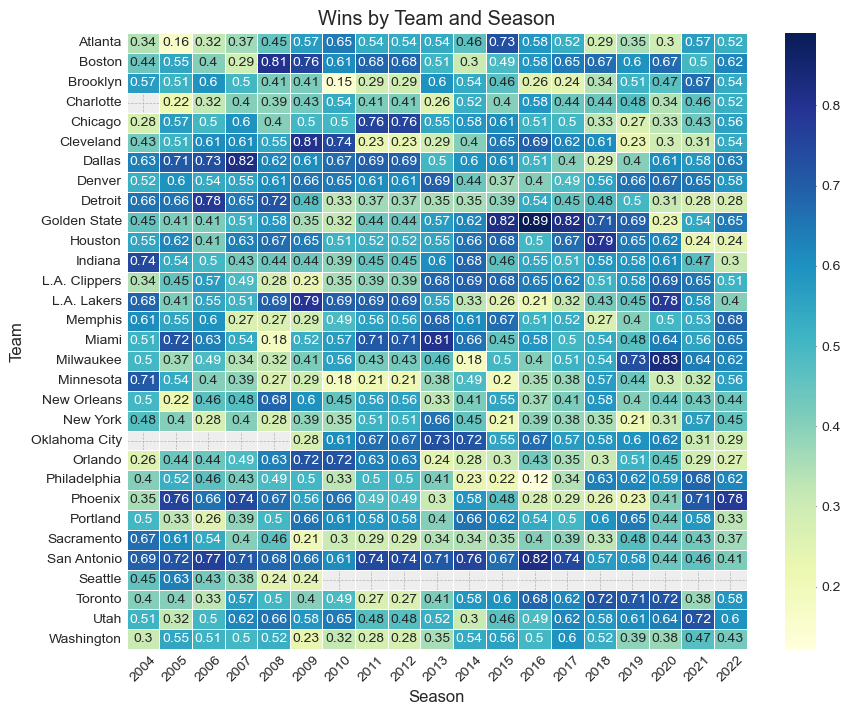

In [68]:
# Win percentage heatmap

wins_season = team_season[['TEAM', 'SEASON', 'W_PCT']]

wins_season['SEASON']=wins_season['SEASON'].astype(int)

wins_season=wins_season.pivot_table(index='TEAM', columns='SEASON', values='W_PCT')

plt.figure(figsize=(10, 8))

sns.heatmap(wins_season, cmap='YlGnBu', annot=True, linewidths=.5)

plt.title('Wins by Team and Season')

plt.xlabel('Season')

plt.ylabel('Team')

plt.xticks(rotation=45)

plt.show()

In [69]:
# Creating win percentage dataframe

win_percentage=team_season[['TEAM', 'G', 'W']].groupby('TEAM').sum()
win_percentage['WIN_PCT']=win_percentage['W']/win_percentage['G']
win_percentage

G     W   WIN_PCT
TEAM                               
Atlanta        1530   711  0.464706
Boston         1611   894  0.554935
Brooklyn       1530   671  0.438562
Charlotte      1448   610  0.421271
Chicago        1530   772  0.504575
Cleveland      1530   759  0.496078
Dallas         1530   912  0.596078
Denver         1530   872  0.569935
Detroit        1530   724  0.473203
Golden State   1530   849  0.554902
Houston        1530   864  0.564706
Indiana        1611   839  0.520795
L.A. Clippers  1530   783  0.511765
L.A. Lakers    1530   803  0.524837
Memphis        1530   771  0.503922
Miami          1530   881  0.575817
Milwaukee      1530   738  0.482353
Minnesota      1530   580  0.379085
New Orleans    1530   716  0.467974
New York       1530   611  0.399346
Oklahoma City  1120   632  0.564286
Orlando        1530   678  0.443137
Philadelphia   1530   689  0.450327
Phoenix        1530   781  0.510458
Portland       1530   784  0.512418
Sacramento     1530   615  0.401961
San Antonio    1530  1012  0.661438
Seattle         492   195  0.396341
Toronto        1530   774  0.505882
Utah           1530   830  0.542484
Washington     1530   664  0.433987

In [70]:
# Dictionary for folium map

locations = {
    'Team': [
        'Atlanta', 'Boston', 'Brooklyn', 'Charlotte',
        'Chicago', 'Cleveland', 'Dallas', 'Denver',
        'Detroit', 'Golden State', 'Houston', 'Indiana',
        'L.A. Clippers', 'L.A. Lakers', 'Memphis', 'Miami',
        'Milwaukee', 'Minnesota', 'New Orleans', 'New York',
        'Oklahoma City', 'Orlando', 'Philadelphia', 'Phoenix',
        'Portland', 'Sacramento', 'San Antonio', 'Seattle', 'Toronto', 'Utah', 'Washington'
    ],
    'Latitude': [
        33.7572, 42.3662, 40.6826, 35.2269, 41.8807, 41.4965, 32.7903, 39.7392, 42.3314,
        37.8048, 29.7573, 39.7640, 34.0430, 34.0522, 35.1495, 25.7617, 43.0389, 44.9778,
        29.9489, 40.7505, 35.4634, 28.5383, 39.9526, 33.4484, 45.5200, 38.5816, 29.3561,
        47.6097, 43.6532, 40.7601, 38.9072
    ],
    'Longitude': [
        -84.3963, -71.0621, -73.9743, -80.8433, -87.6742, -81.6882, -96.7652, -104.9903, -83.0458,
        -122.4010, -95.3698, -86.1555, -118.2673, -118.2440, -90.0490, -80.1918, -87.9065, -93.2650,
        -90.0813, -73.9934, -97.5164, -81.3792, -75.1652, -112.0740, -122.6750, -121.4950, -98.4876,
        -122.3331, -79.3832, -111.8990, -77.0369
    ],
    
    'Win_Pct':list(win_percentage['WIN_PCT'])
}

team_wins_folium = pd.DataFrame(locations)

team_wins_folium

Team  Latitude  Longitude   Win_Pct
0         Atlanta   33.7572   -84.3963  0.464706
1          Boston   42.3662   -71.0621  0.554935
2        Brooklyn   40.6826   -73.9743  0.438562
3       Charlotte   35.2269   -80.8433  0.421271
4         Chicago   41.8807   -87.6742  0.504575
5       Cleveland   41.4965   -81.6882  0.496078
6          Dallas   32.7903   -96.7652  0.596078
7          Denver   39.7392  -104.9903  0.569935
8         Detroit   42.3314   -83.0458  0.473203
9    Golden State   37.8048  -122.4010  0.554902
10        Houston   29.7573   -95.3698  0.564706
11        Indiana   39.7640   -86.1555  0.520795
12  L.A. Clippers   34.0430  -118.2673  0.511765
13    L.A. Lakers   34.0522  -118.2440  0.524837
14        Memphis   35.1495   -90.0490  0.503922
15          Miami   25.7617   -80.1918  0.575817
16      Milwaukee   43.0389   -87.9065  0.482353
17      Minnesota   44.9778   -93.2650  0.379085
18    New Orleans   29.9489   -90.0813  0.467974
19       New York   40.7505   -73.9934  0.399346
20  Oklahoma City   35.4634   -97.5164  0.564286
21        Orlando   28.5383   -81.3792  0.443137
22   Philadelphia   39.9526   -75.1652  0.450327
23        Phoenix   33.4484  -112.0740  0.510458
24       Portland   45.5200  -122.6750  0.512418
25     Sacramento   38.5816  -121.4950  0.401961
26    San Antonio   29.3561   -98.4876  0.661438
27        Seattle   47.6097  -122.3331  0.396341
28        Toronto   43.6532   -79.3832  0.505882
29           Utah   40.7601  -111.8990  0.542484
30     Washington   38.9072   -77.0369  0.433987

In [71]:
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

for index, row in team_wins_folium.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=(row['Win_Pct']**4)*100, # Strenghtening winning effect by raising win percentage to the power
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['Team']} - {round(row['Win_Pct']*100, 2)}%"
    ).add_to(m)

m